In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Loading the data
df=pd.read_csv("D:\\ML Data\\employees.csv")
df.sample(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
42332,66568,Technology,region_16,Bachelor's,f,other,1,27,NaN,1,0,0,77,0
34337,7826,HR,region_16,Below Secondary,f,other,1,25,NaN,1,1,0,51,0
35537,77162,Operations,region_2,Bachelor's,m,other,1,47,3.0,6,0,0,57,0
16378,436,Sales & Marketing,region_32,Bachelor's,m,other,1,35,4.0,2,1,0,48,0
4479,28229,Sales & Marketing,region_2,Bachelor's,m,sourcing,2,33,1.0,6,0,0,47,0


In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df.shape

(54808, 14)

In [6]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
df.isnull()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54804,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54805,False,False,False,False,False,False,False,False,False,False,False,False,False,False
54806,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

## Checking for Univariate Outliers

<AxesSubplot:xlabel='no_of_trainings'>

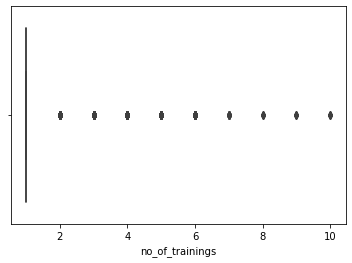

In [9]:
sns.boxplot(df['no_of_trainings'])

<AxesSubplot:xlabel='age'>

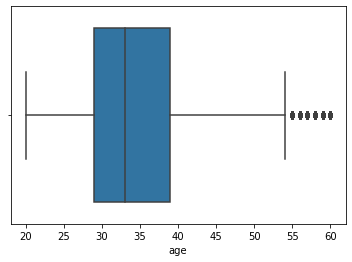

In [10]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='previous_year_rating'>

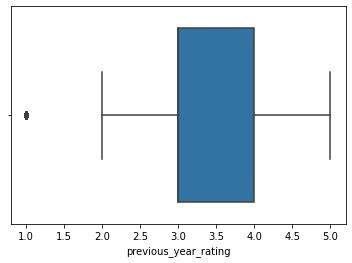

In [11]:
sns.boxplot(df['previous_year_rating'])

<AxesSubplot:xlabel='length_of_service'>

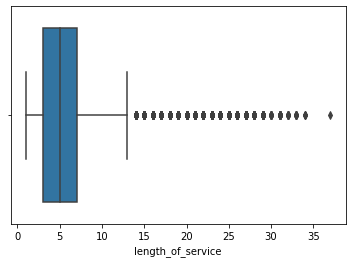

In [12]:
sns.boxplot(df['length_of_service'])

<AxesSubplot:xlabel='avg_training_score'>

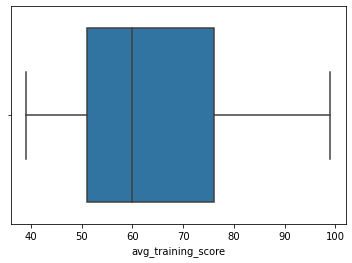

In [13]:
sns.boxplot(df['avg_training_score'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [15]:
df['education'].isnull().sum()

2409

In [16]:
df['education'].isnull().sum()/len(df)*100

4.395343745438622

In [17]:
df['previous_year_rating'].isnull().sum()/len(df)*100

7.524448985549554

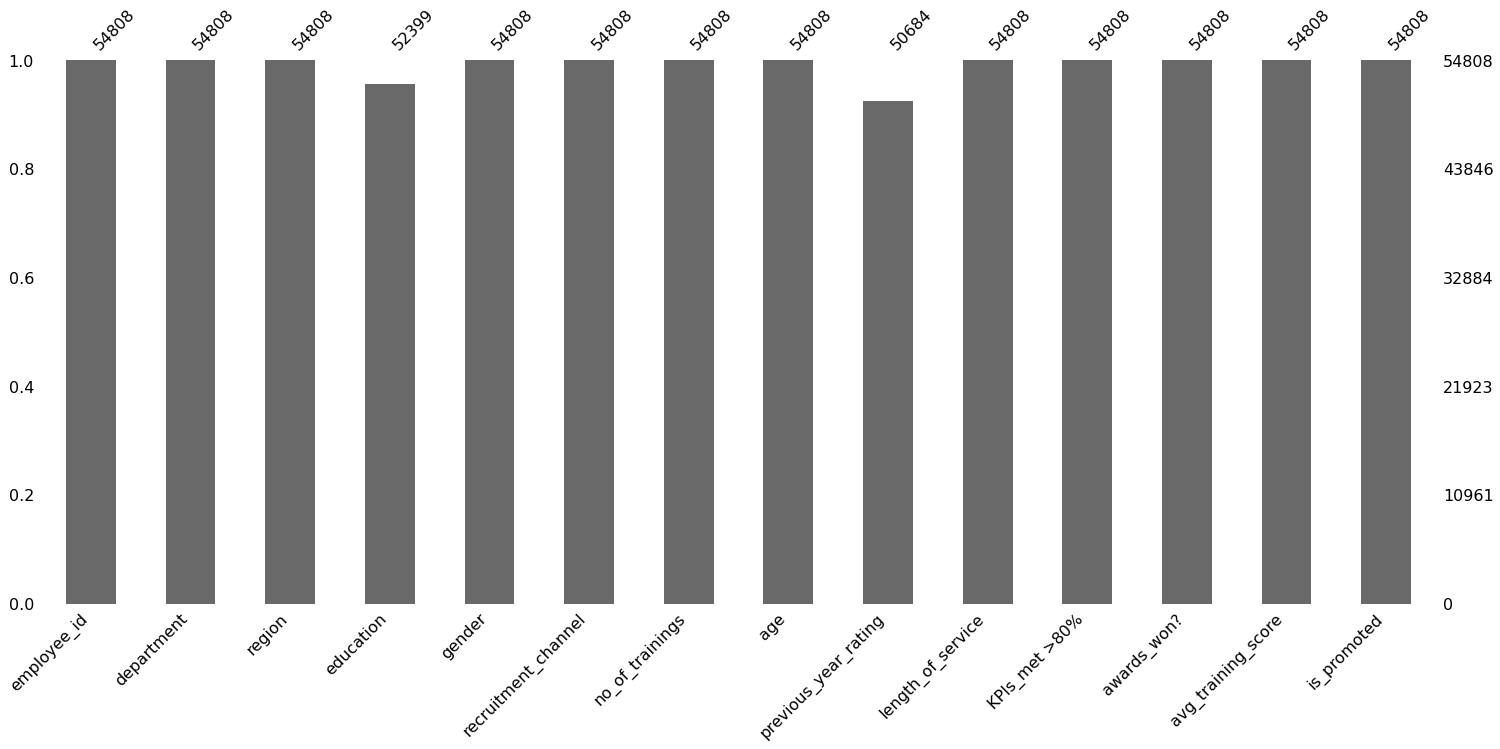

In [18]:
import missingno as msno
msno.bar(df)
plt.show()

In [19]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales & Marketing'),
  Text(1, 0, 'Operations'),
  Text(2, 0, 'Technology'),
  Text(3, 0, 'Analytics'),
  Text(4, 0, 'R&D'),
  Text(5, 0, 'Procurement'),
  Text(6, 0, 'Finance'),
  Text(7, 0, 'HR'),
  Text(8, 0, 'Legal')])

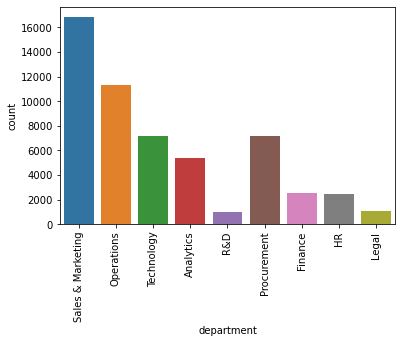

In [20]:
sns.countplot(df.department)
plt.xticks(rotation=90)

In [21]:
df['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [22]:
df['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [23]:
edu=pd.crosstab(df['education'],columns='Different types of qualifications')
edu

col_0,Different types of qualifications
education,
Bachelor's,36669
Below Secondary,805
Master's & above,14925


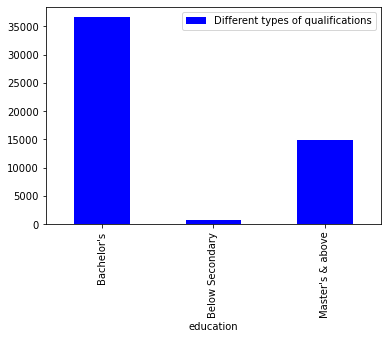

In [24]:
edu.plot(kind='bar',color='b')
plt.legend()

In [25]:
df['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

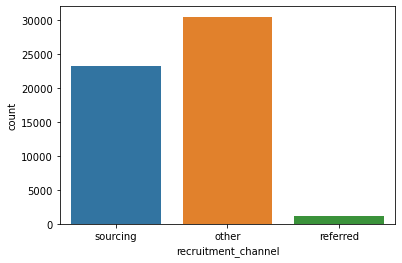

In [26]:
sns.countplot(df.recruitment_channel)

<AxesSubplot:xlabel='gender', ylabel='count'>

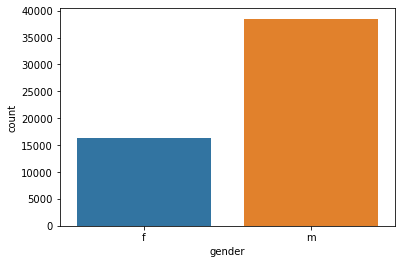

In [27]:
sns.countplot(df.gender)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

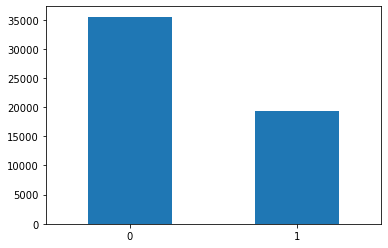

In [28]:
df['KPIs_met >80%'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

<AxesSubplot:xlabel='awards_won?', ylabel='count'>

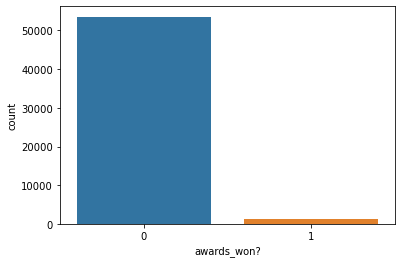

In [29]:
sns.countplot(df['awards_won?'])

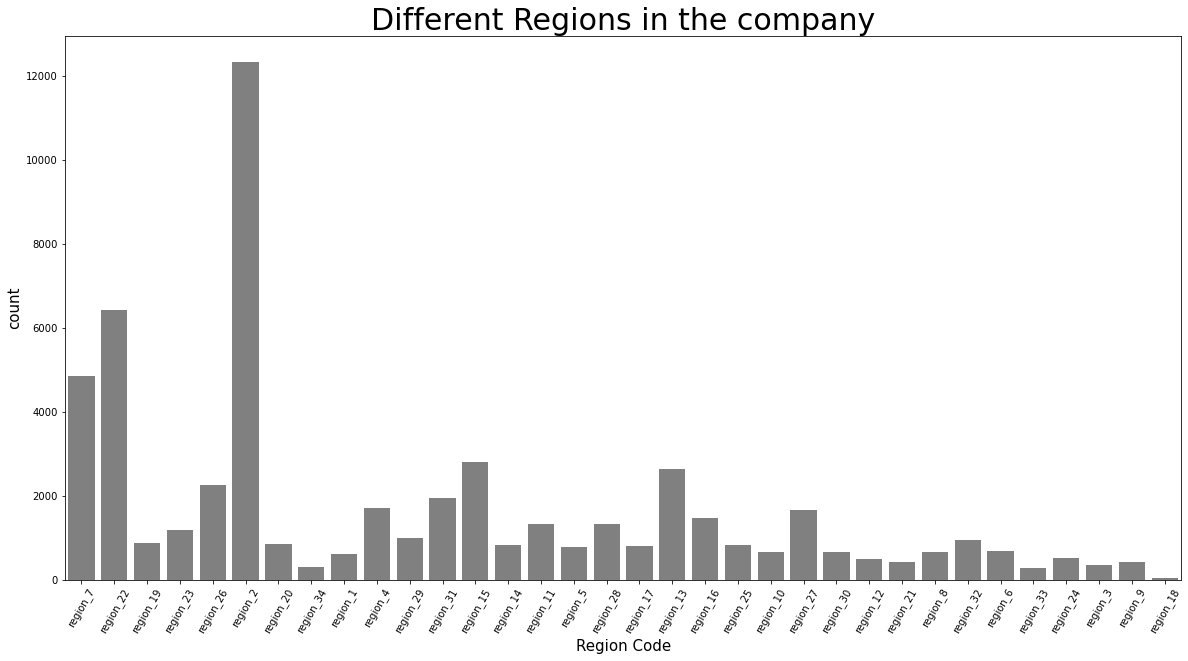

In [30]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['region'], color = 'grey')
plt.title('Different Regions in the company', fontsize = 30)
plt.xticks(rotation = 60)
plt.xlabel('Region Code', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

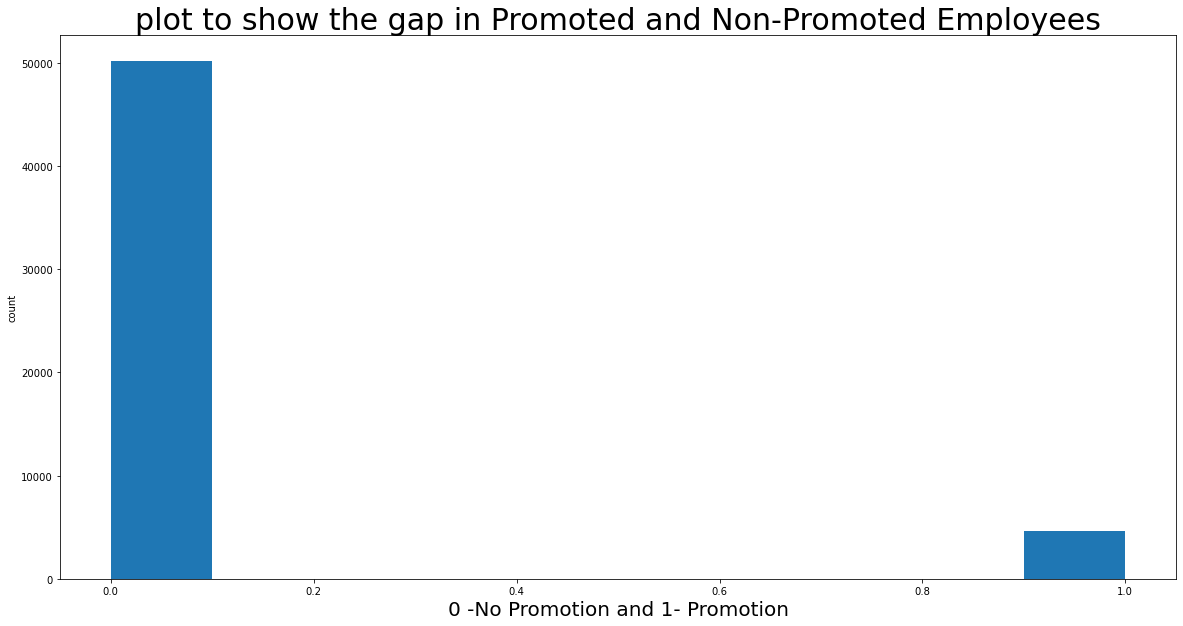

In [31]:
plt.hist(df['is_promoted'])
plt.title('plot to show the gap in Promoted and Non-Promoted Employees', fontsize = 30)
plt.xlabel('0 -No Promotion and 1- Promotion', fontsize = 20)
plt.ylabel('count')
plt.show()

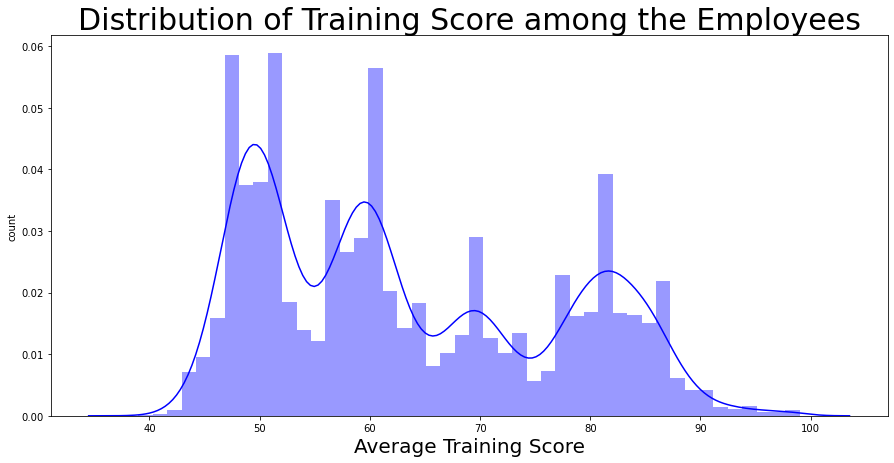

In [32]:
# checking the distribution of the avg_training score of the Employees

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(df['avg_training_score'], color = 'blue')
plt.title('Distribution of Training Score among the Employees', fontsize = 30)
plt.xlabel('Average Training Score', fontsize = 20)
plt.ylabel('count')
plt.show()

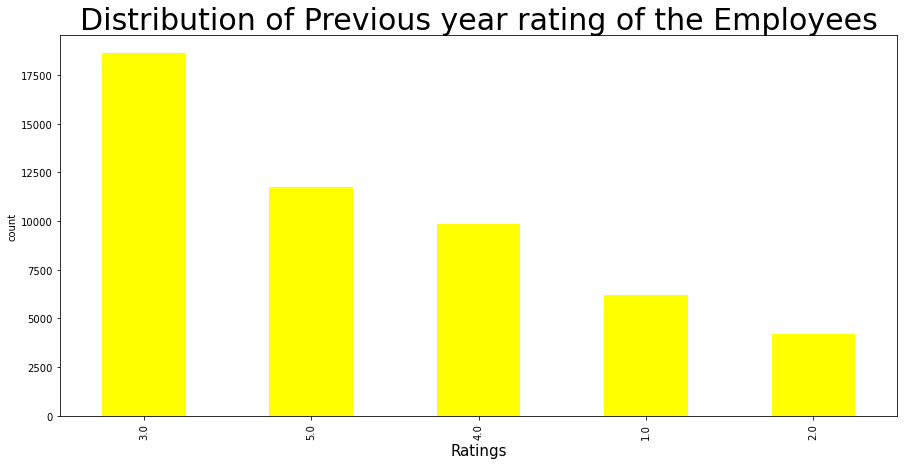

In [33]:
df['previous_year_rating'].value_counts().plot.bar(color = 'yellow', figsize = (15, 7))
plt.title('Distribution of Previous year rating of the Employees', fontsize = 30)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('count')
plt.show()

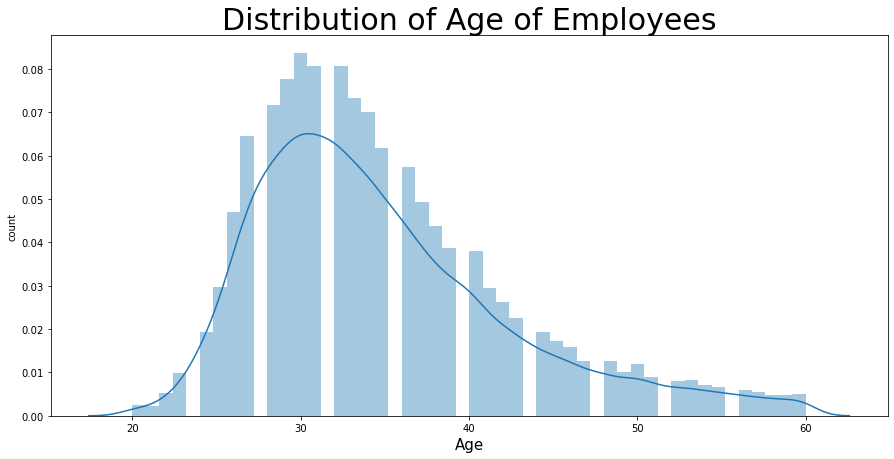

In [34]:
# checking the distribution of age of Employees in the company

sns.distplot(df['age'])
plt.title('Distribution of Age of Employees', fontsize = 30)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('count')
plt.show()

<AxesSubplot:xlabel='no_of_trainings', ylabel='count'>

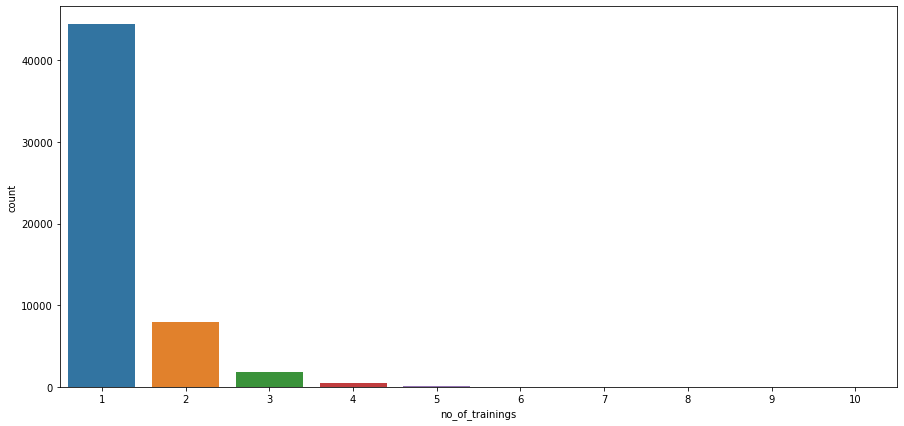

In [35]:
sns.countplot(df.no_of_trainings)

## Bivariate Analysis

In [36]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


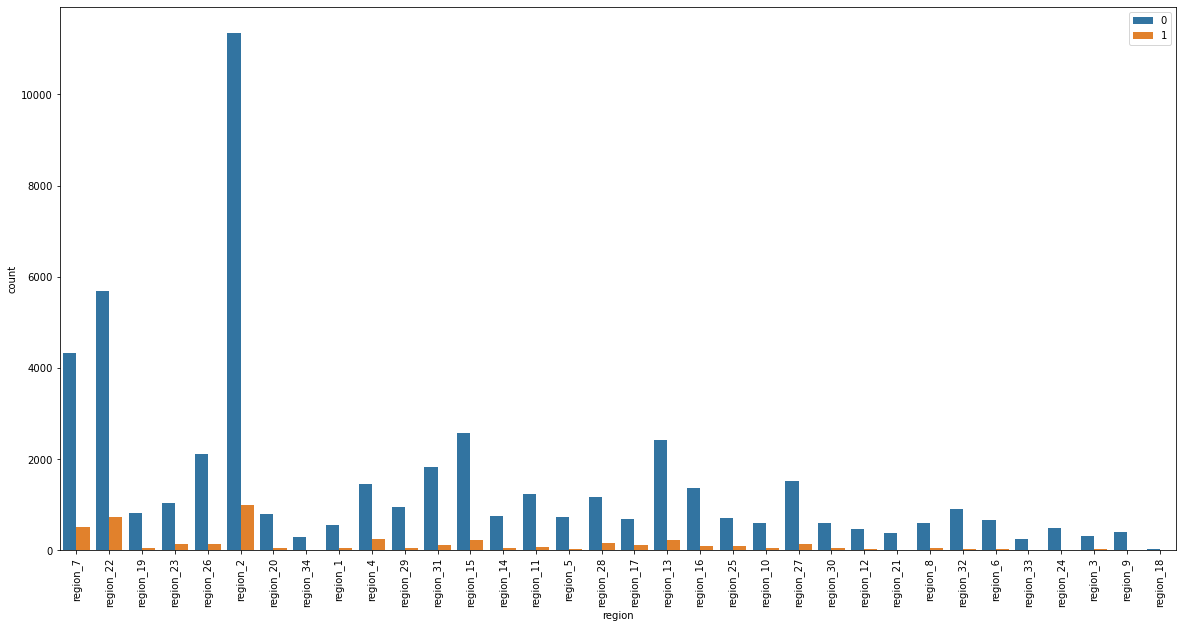

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(df['region'],hue=df['is_promoted'])
plt.xticks(rotation=90)
plt.legend()
plt.show()

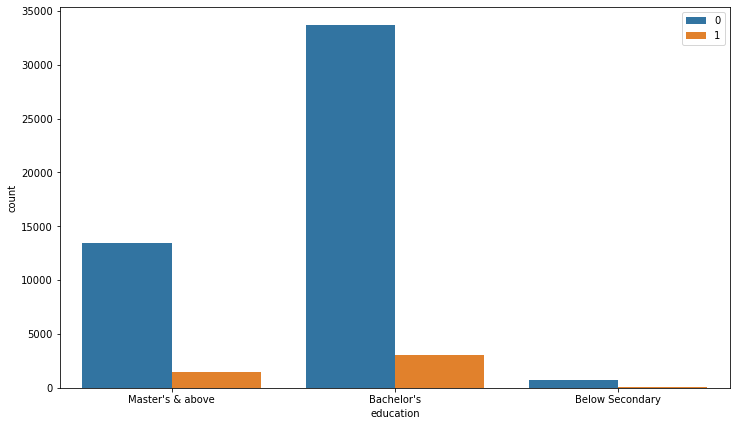

In [38]:
plt.figure(figsize=(12,7))
sns.countplot(df['education'],hue=df['is_promoted'])
plt.legend()
plt.show()

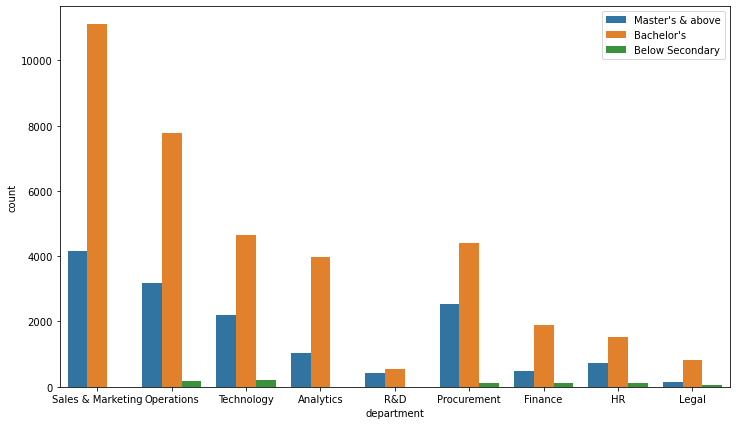

In [39]:
plt.figure(figsize=(12,7))
sns.countplot(df['department'],hue=df['education'])
plt.legend()
plt.show()

In [40]:
df.loc[df['department'] == 'Legal', 'education'] = "Bachelor's"

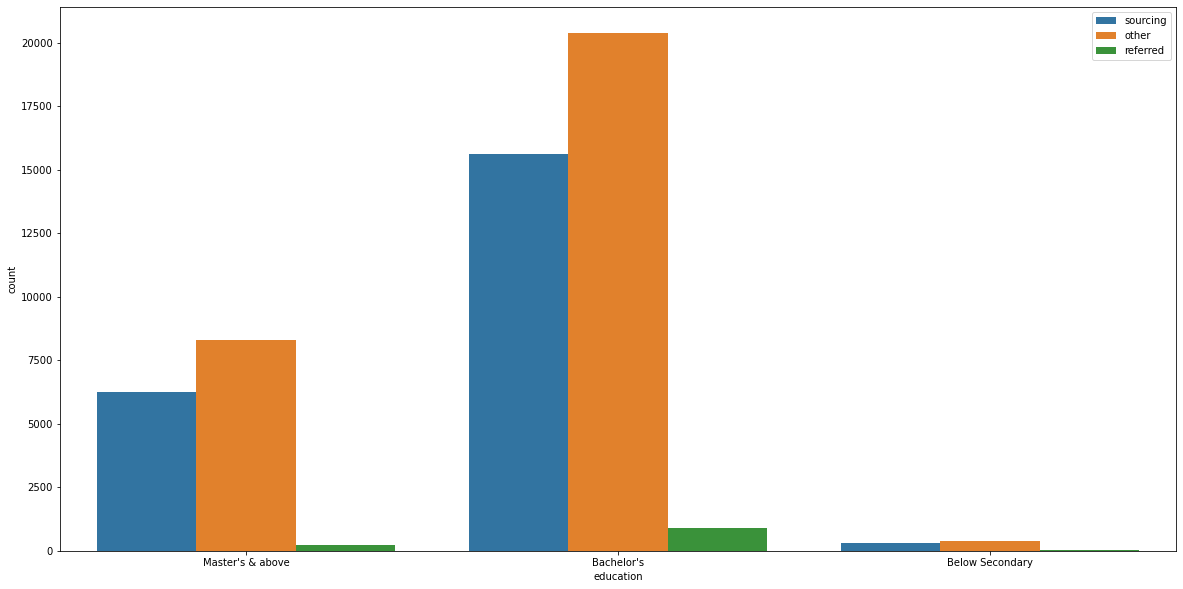

In [41]:
plt.figure(figsize=(20,10))
sns.countplot(df['education'],hue=df['recruitment_channel'])
plt.legend()
plt.show()

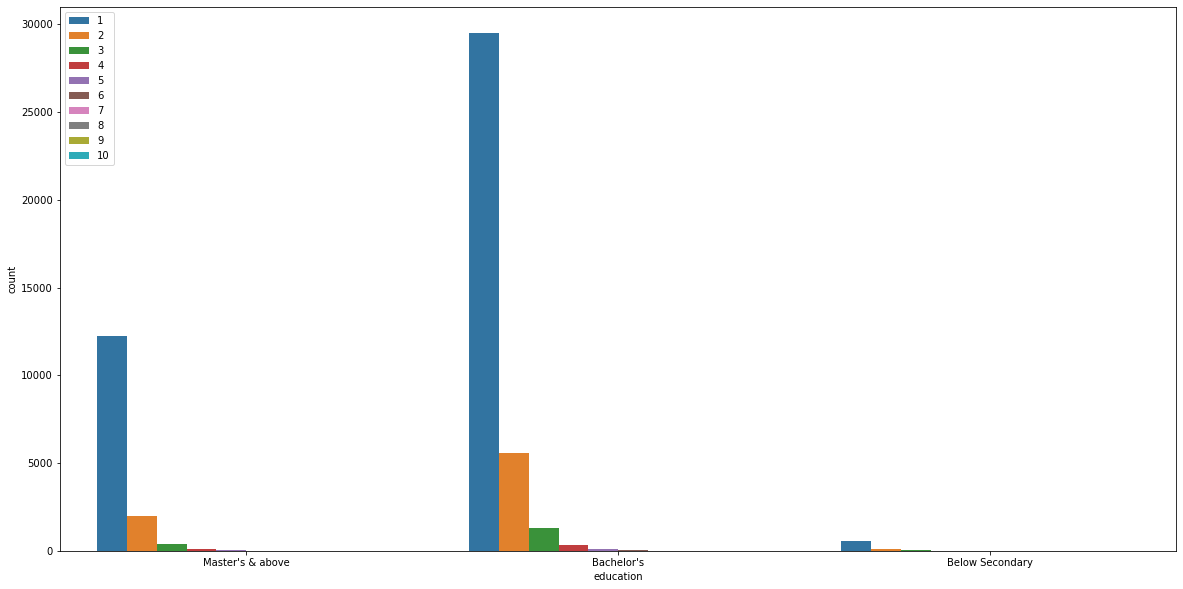

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(df['education'],hue=df['no_of_trainings'])
plt.legend()
plt.show()

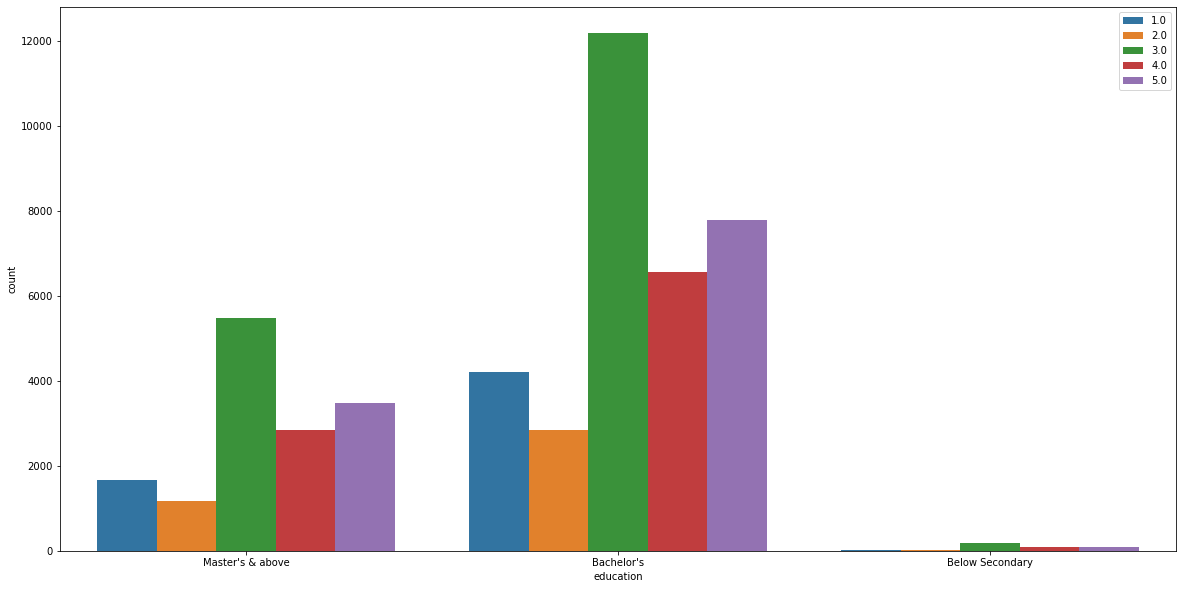

In [43]:
plt.figure(figsize=(20,10))
sns.countplot(df['education'],hue=df['previous_year_rating'])
plt.legend()
plt.show()

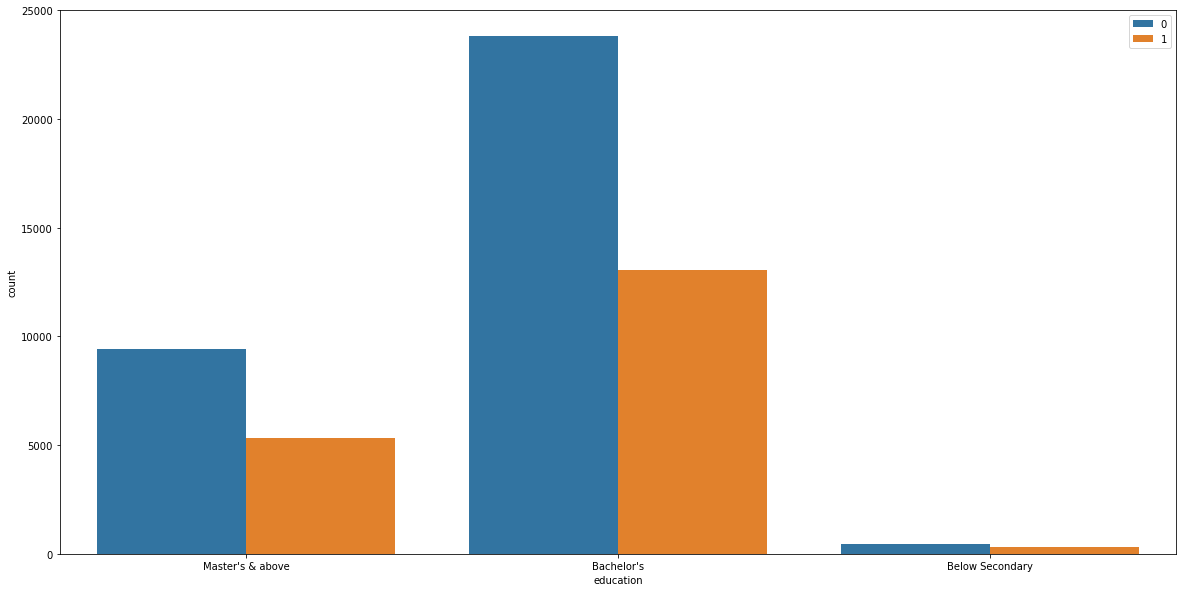

In [44]:
plt.figure(figsize=(20,10))
sns.countplot(df['education'],hue=df['KPIs_met >80%'])
plt.legend()
plt.show()

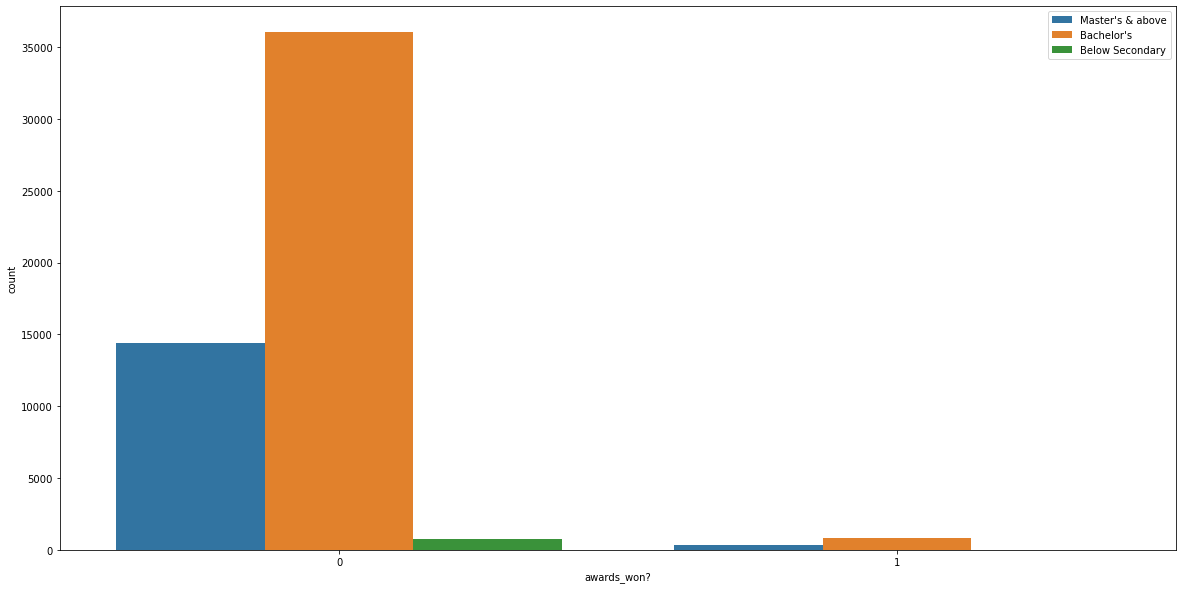

In [45]:
plt.figure(figsize=(20,10))
sns.countplot(df['awards_won?'],hue=df['education'])
plt.legend()
plt.show()

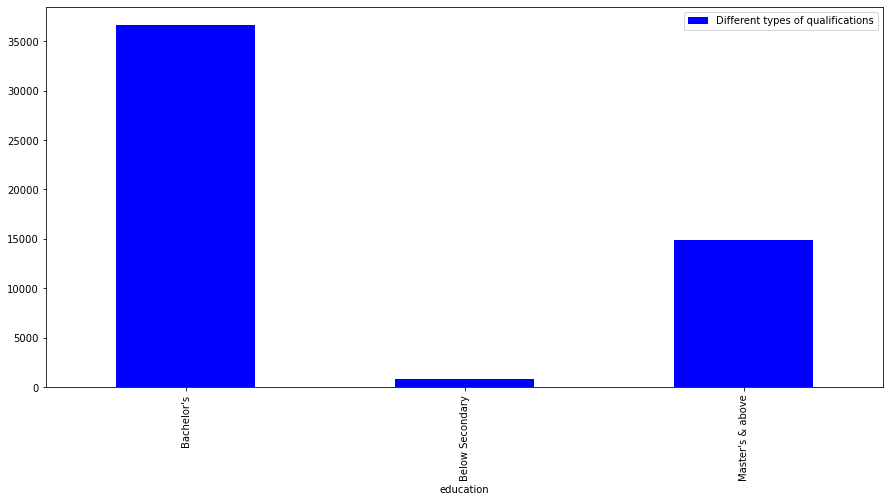

In [46]:
edu.plot(kind='bar',color='b')
plt.legend()

In [47]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2405
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Since there were no obvious relations betweeen education and other departments therefore we can fill the null values with mode

In [48]:
df['education'].fillna(df['education'].mode()[0], inplace = True)

In [49]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [50]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


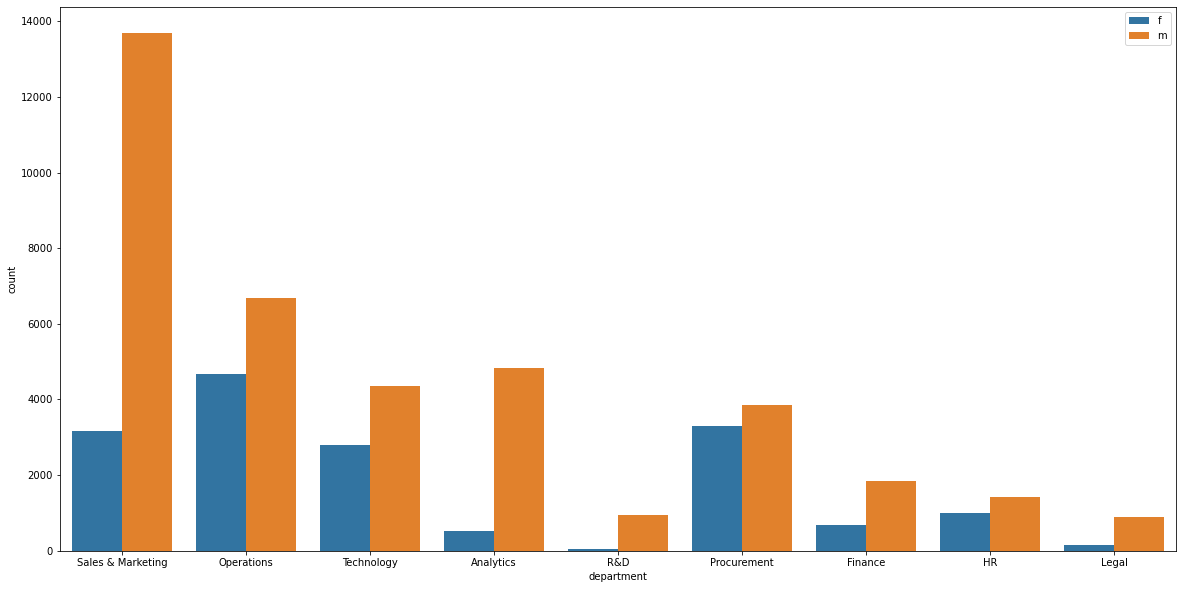

In [51]:
plt.figure(figsize=(20,10))
sns.countplot(df['department'],hue=df['gender'])
plt.legend()
plt.show()

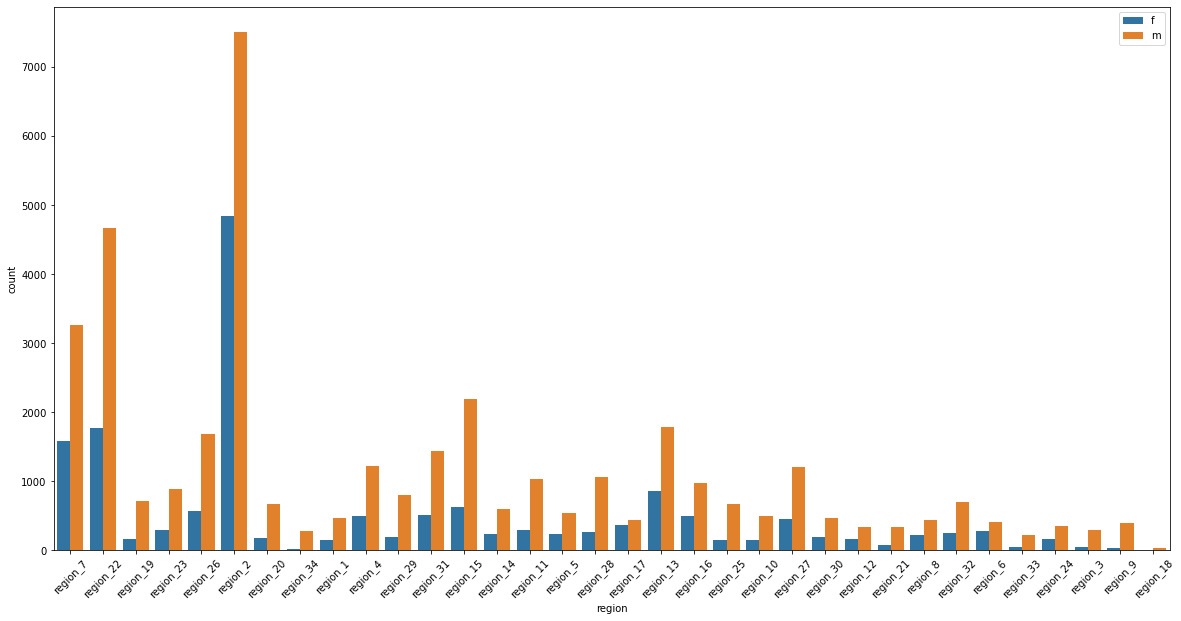

In [52]:
plt.figure(figsize=(20,10))
sns.countplot(df['region'],hue=df['gender'])
plt.xticks(rotation=45)
plt.legend()
plt.show()

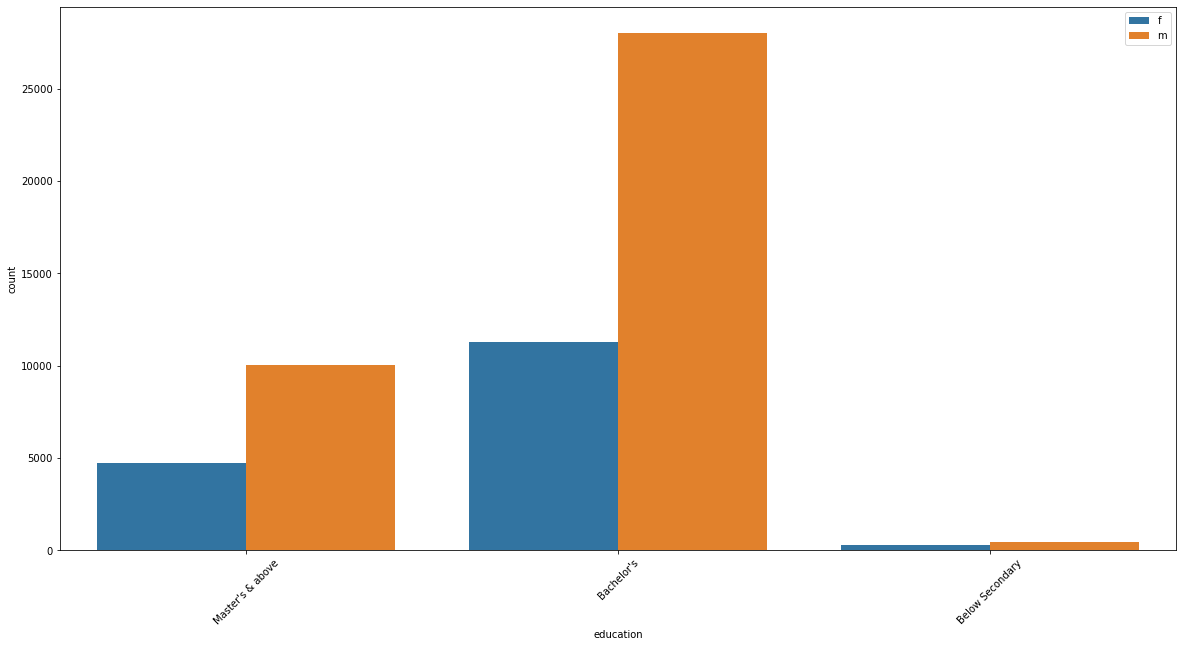

In [53]:
plt.figure(figsize=(20,10))
sns.countplot(df['education'],hue=df['gender'])
plt.xticks(rotation=45)
plt.legend()
plt.show()

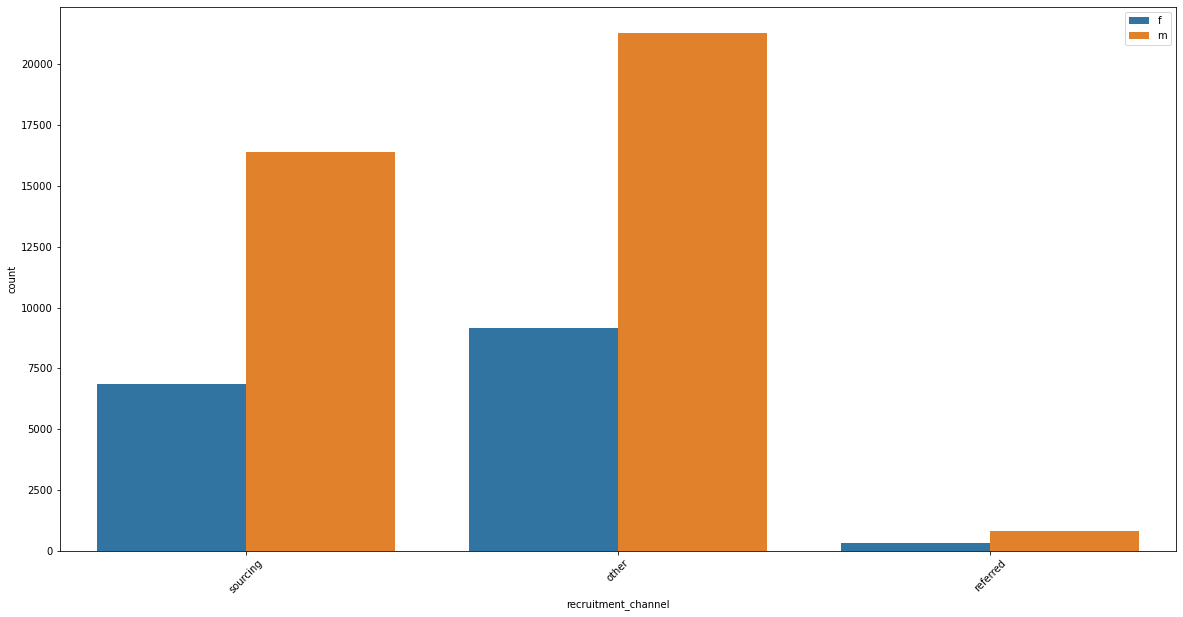

In [54]:
plt.figure(figsize=(20,10))
sns.countplot(df['recruitment_channel'],hue=df['gender'])
plt.xticks(rotation=45)
plt.legend()
plt.show()

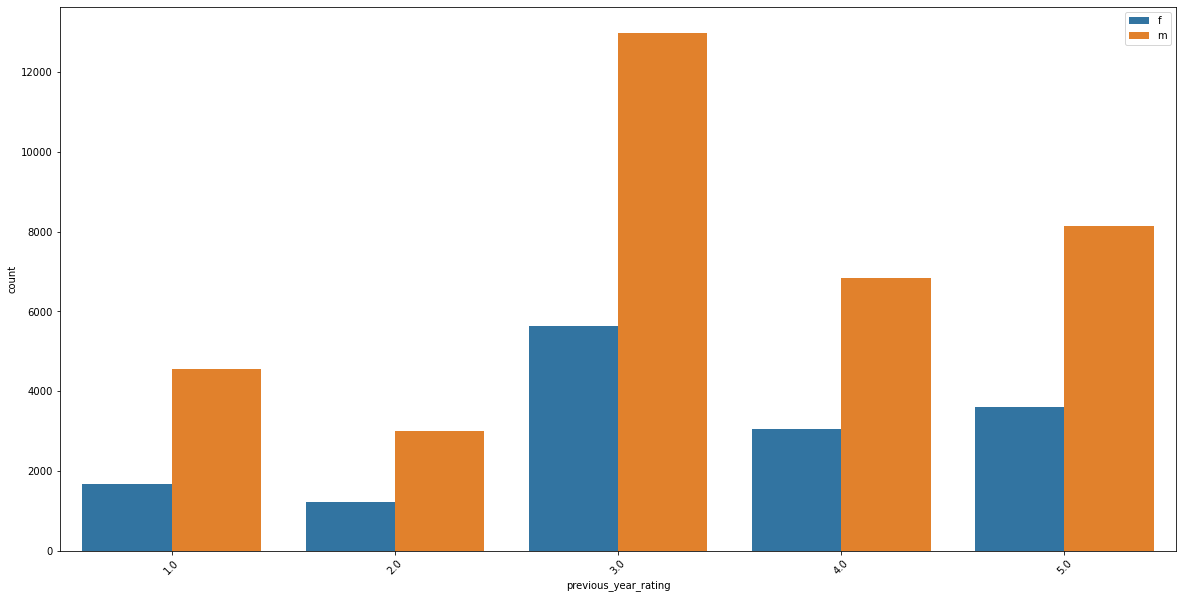

In [55]:
plt.figure(figsize=(20,10))
sns.countplot(df['previous_year_rating'],hue=df['gender'])
plt.xticks(rotation=45)
plt.legend()
plt.show()

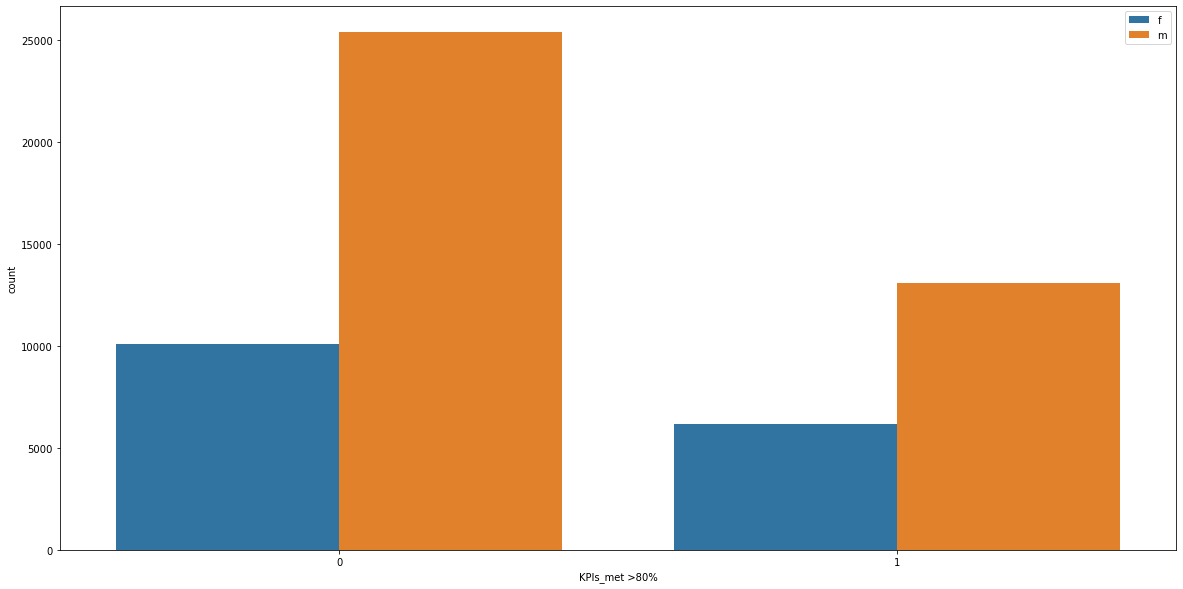

In [56]:
plt.figure(figsize=(20,10))
sns.countplot(df['KPIs_met >80%'],hue=df['gender'])
plt.legend()
plt.show()

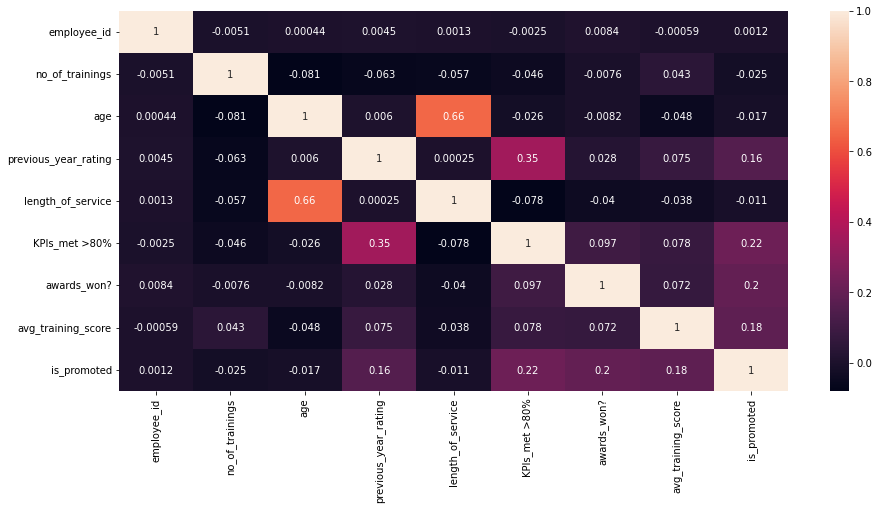

In [57]:
cor = sns.heatmap(df.corr(), annot=True)

In [58]:
df.pivot_table(values='previous_year_rating',index='gender')

,previous_year_rating
gender,
f,3.376006
m,3.309316


In [59]:
df.pivot_table(values='length_of_service',index='gender')

,length_of_service
gender,
f,5.994421
m,5.810889


In [60]:
df.pivot_table(values='avg_training_score',index='gender')

,avg_training_score
gender,
f,63.889897
m,63.173550


In [61]:
df.pivot_table(values='is_promoted',index='gender')

,is_promoted
gender,
f,0.089934
m,0.083151


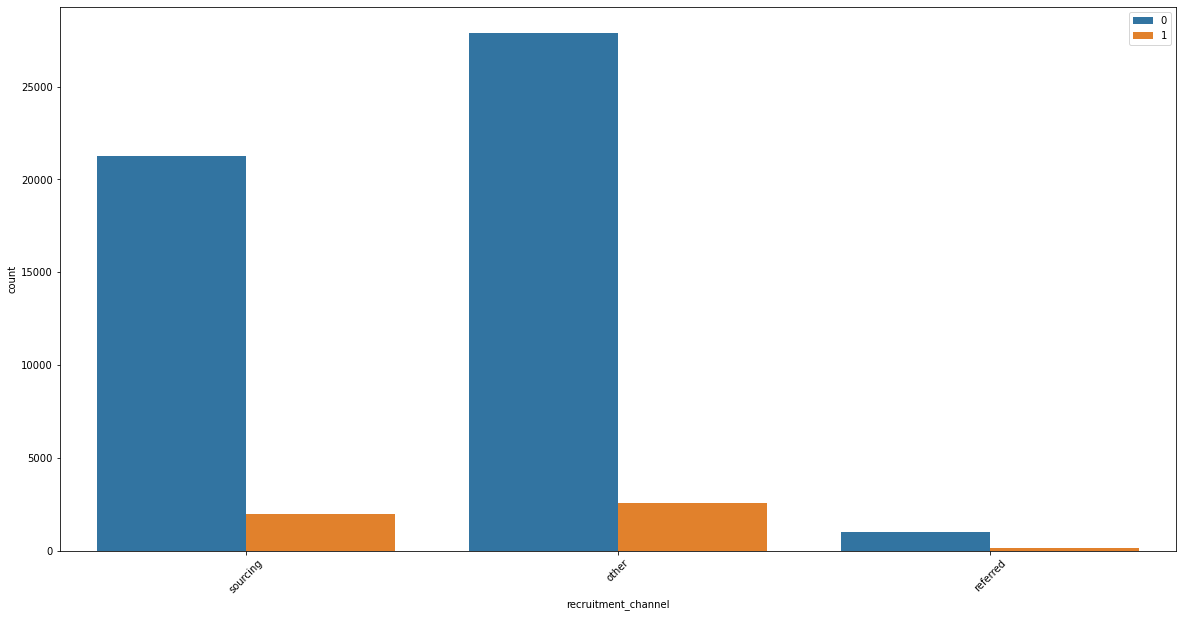

In [62]:
plt.figure(figsize=(20,10))
sns.countplot(df['recruitment_channel'],hue=df['is_promoted'])
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [63]:
df.pivot_table(values='avg_training_score',index='recruitment_channel')

,avg_training_score
recruitment_channel,
other,63.362839
referred,66.182137
sourcing,63.280620


In [64]:
df.pivot_table(values='is_promoted',index='recruitment_channel')

,is_promoted
recruitment_channel,
other,0.083952
referred,0.120841
sourcing,0.085013


In [65]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


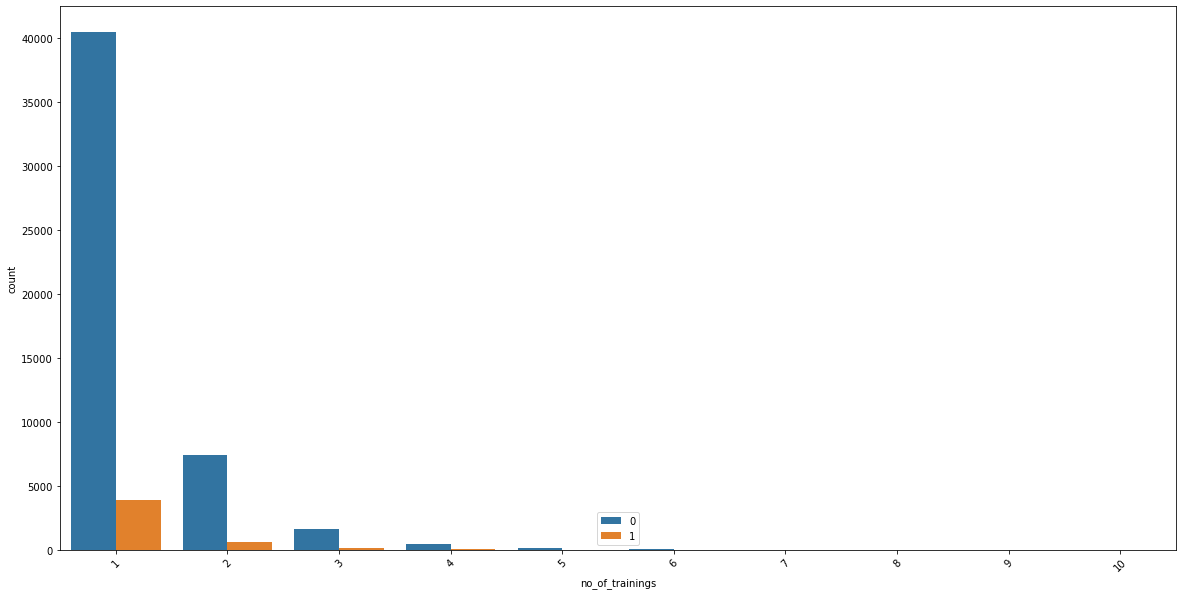

In [66]:
plt.figure(figsize=(20,10))
sns.countplot(df['no_of_trainings'],hue=df['is_promoted'])
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [67]:
df.pivot_table(values='previous_year_rating',index='is_promoted')

,previous_year_rating
is_promoted,
0,3.267911
1,3.986140


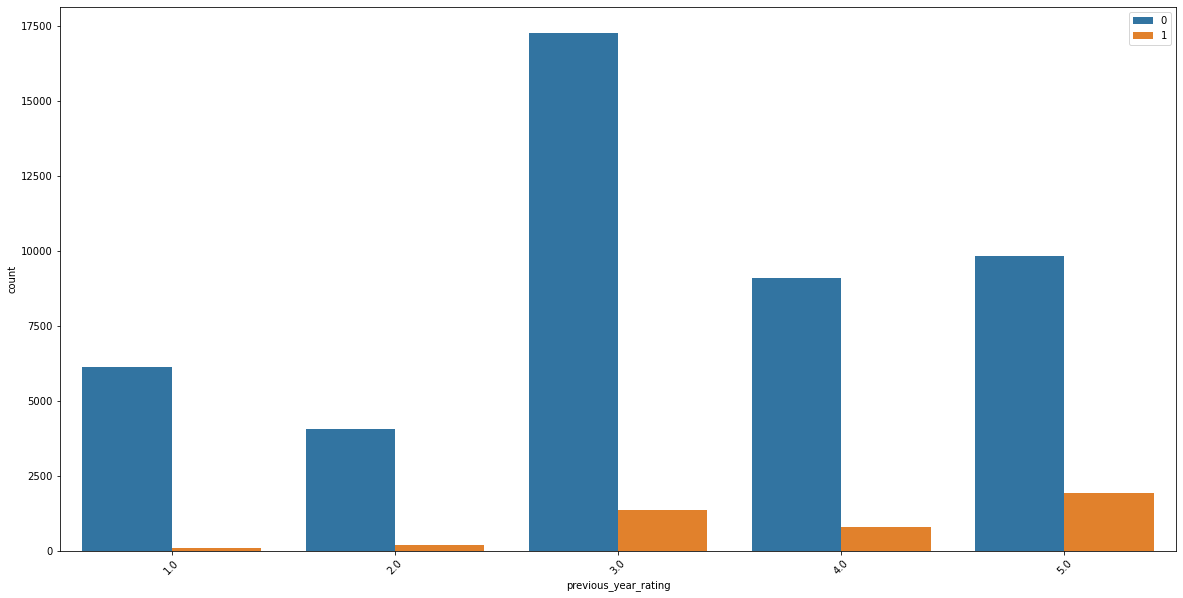

In [68]:
plt.figure(figsize=(20,10))
sns.countplot(df['previous_year_rating'],hue=df['is_promoted'])
plt.xticks(rotation=45)
plt.legend()
plt.show()

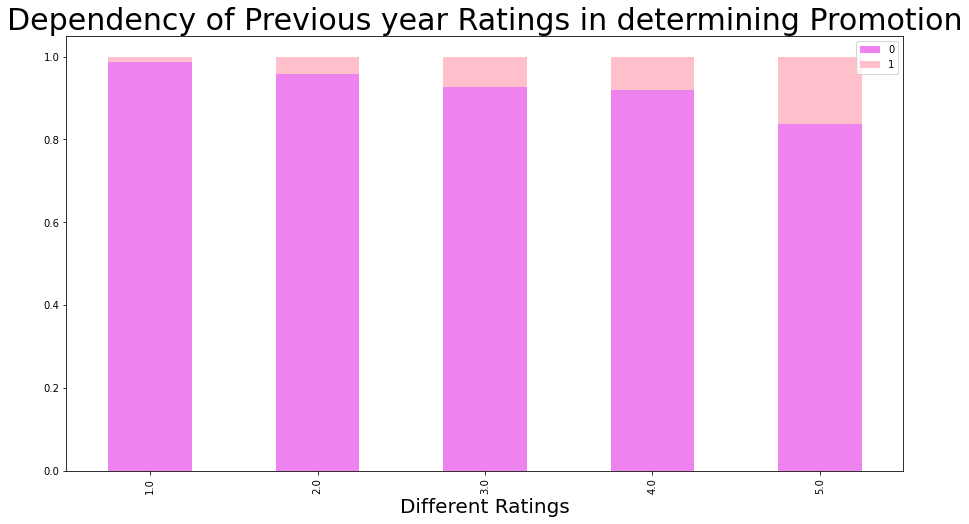

In [69]:
data = pd.crosstab(df['previous_year_rating'], df['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8), color = ['violet', 'pink'])

plt.title('Dependency of Previous year Ratings in determining Promotion', fontsize = 30)
plt.xlabel('Different Ratings', fontsize = 20)
plt.legend()
plt.show()


In [70]:
df.pivot_table(values='previous_year_rating',index='KPIs_met >80%')

,previous_year_rating
KPIs_met >80%,
0,3.00265
1,3.93008


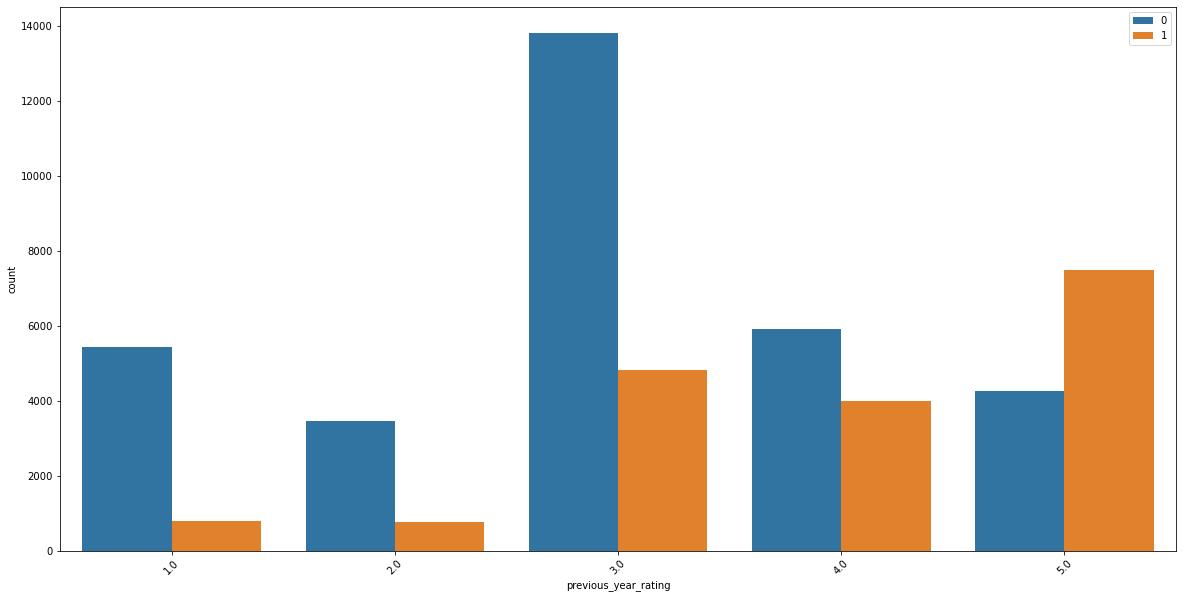

In [71]:
plt.figure(figsize=(20,10))
sns.countplot(df['previous_year_rating'],hue=df['KPIs_met >80%'])
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [72]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [73]:
df.pivot_table(values='previous_year_rating',index='awards_won?')

,previous_year_rating
awards_won?,
0,3.323874
1,3.556218


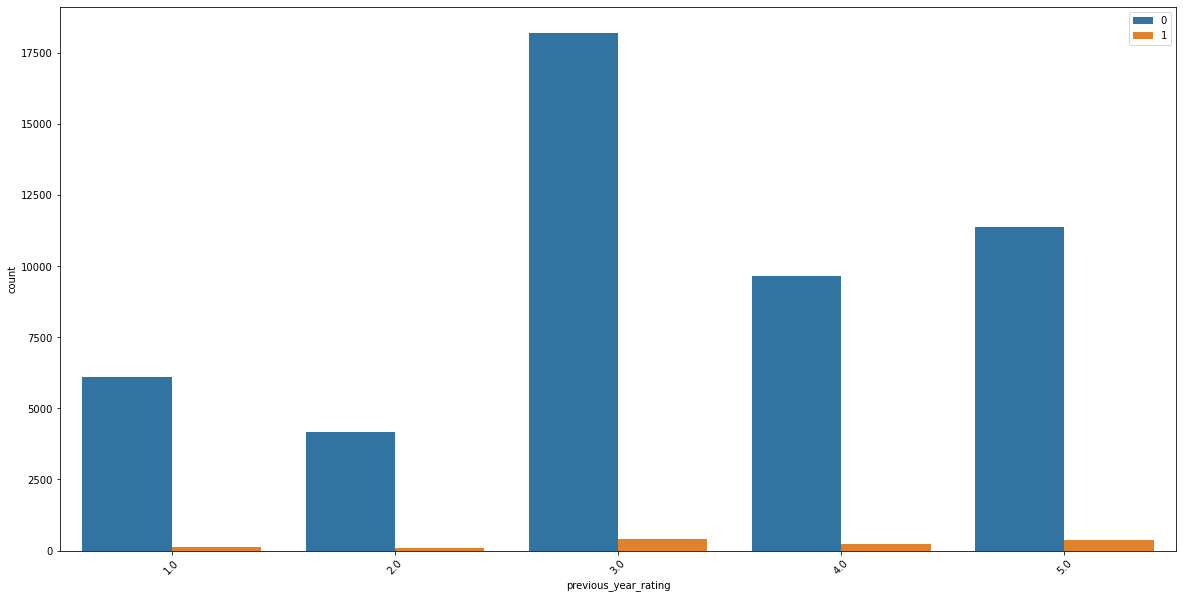

In [74]:
plt.figure(figsize=(20,10))
sns.countplot(df['previous_year_rating'],hue=df['awards_won?'])
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [75]:
df.loc[df['awards_won?'] == 1, 'previous_year_rating'] = 4

In [76]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4028
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [77]:
df.previous_year_rating.median()

3.0

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

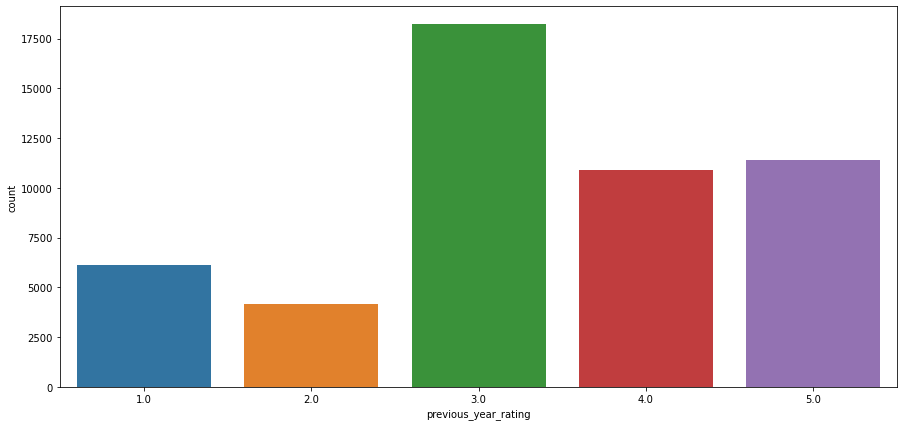

In [78]:
sns.countplot(df['previous_year_rating'])

In [79]:
df['previous_year_rating'].fillna(3.0, inplace = True)

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

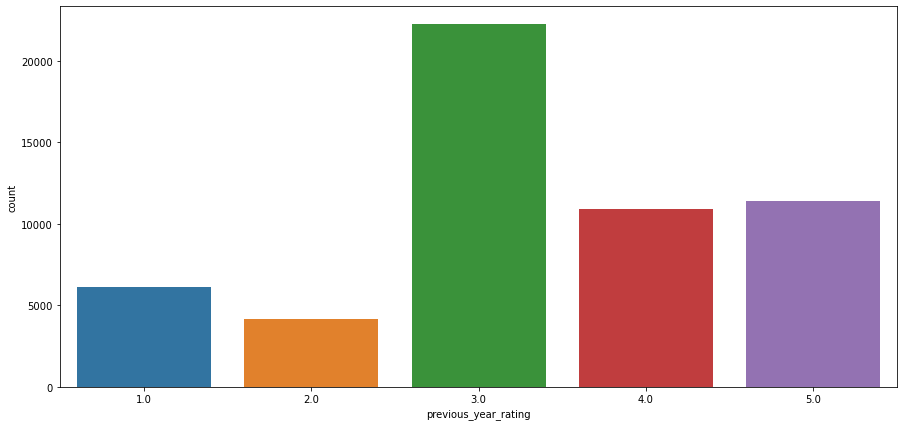

In [80]:
sns.countplot(df['previous_year_rating'])

In [81]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [82]:
df.pivot_table(values='length_of_service',index='KPIs_met >80%')

,length_of_service
KPIs_met >80%,
0,6.109722
1,5.415893


In [83]:
df.pivot_table(values='length_of_service',index='awards_won?')

,length_of_service
awards_won?,
0,5.891740
1,4.759843


In [84]:
df.pivot_table(values='length_of_service',index='is_promoted')

,length_of_service
is_promoted,
0,5.879398
1,5.716367


In [85]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


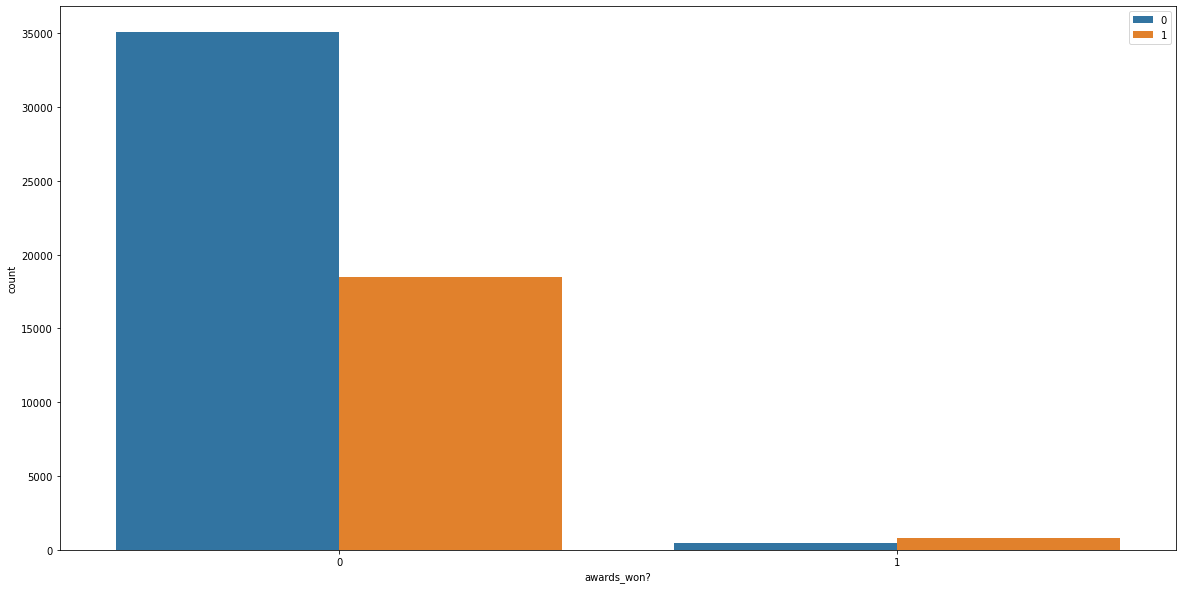

In [86]:
plt.figure(figsize=(20,10))
sns.countplot(df['awards_won?'],hue=df['KPIs_met >80%'])
plt.legend()
plt.show()

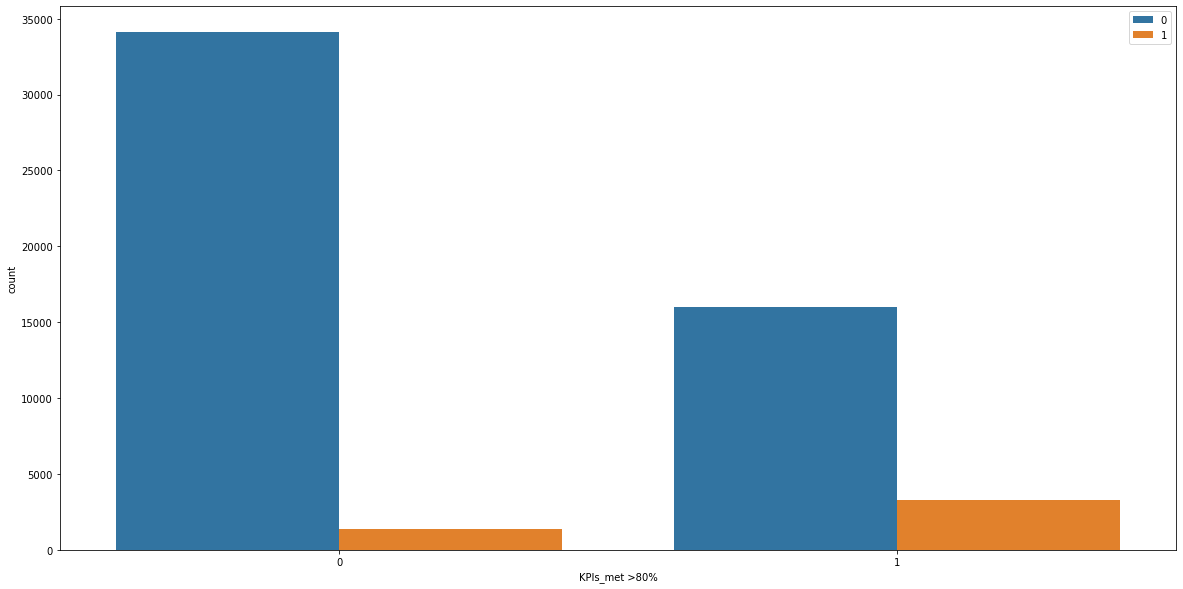

In [87]:
plt.figure(figsize=(20,10))
sns.countplot(df['KPIs_met >80%'],hue=df['is_promoted'])
plt.legend()
plt.show()

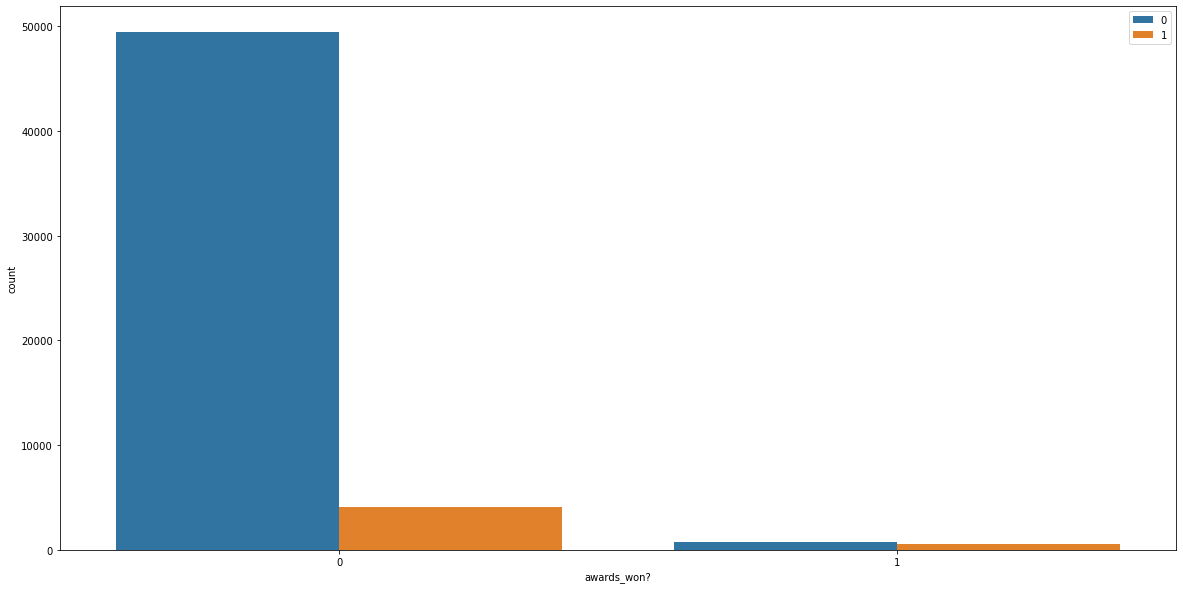

In [88]:
plt.figure(figsize=(20,10))
sns.countplot(df['awards_won?'],hue=df['is_promoted'])
plt.legend()
plt.show()

In [89]:
df.pivot_table(values='avg_training_score',index='is_promoted')

,avg_training_score
is_promoted,
0,62.647686
1,71.325193


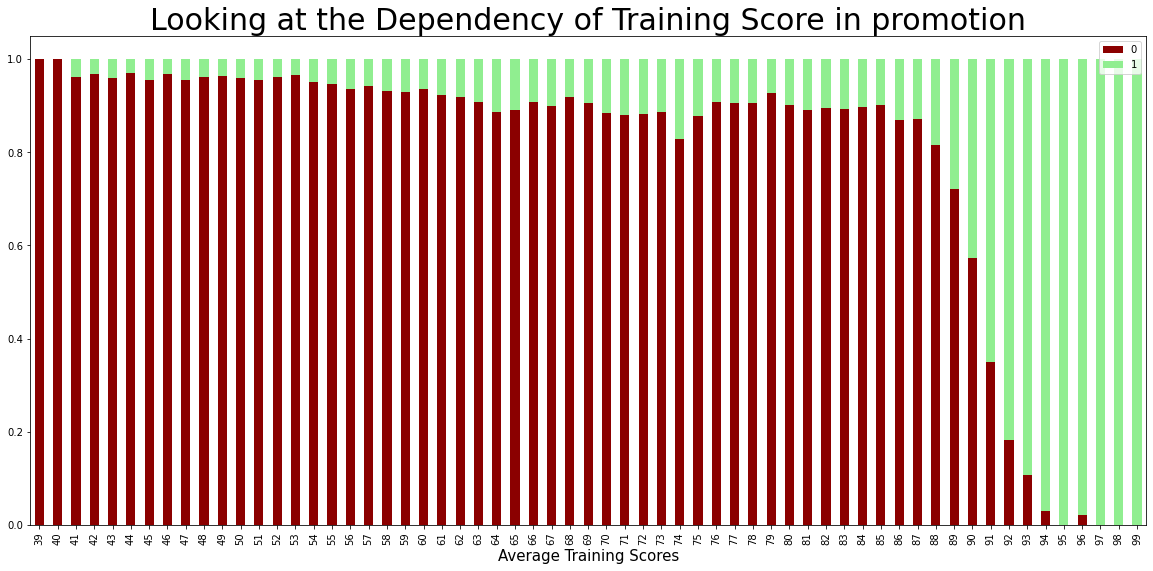

In [90]:
data = pd.crosstab(df['avg_training_score'], df['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['darkred', 'lightgreen'])

plt.title('Looking at the Dependency of Training Score in promotion', fontsize = 30)
plt.xlabel('Average Training Scores', fontsize = 15)
plt.legend()
plt.show()

In [91]:
df['age'].values[df['age'].values>56]=56

<AxesSubplot:xlabel='age'>

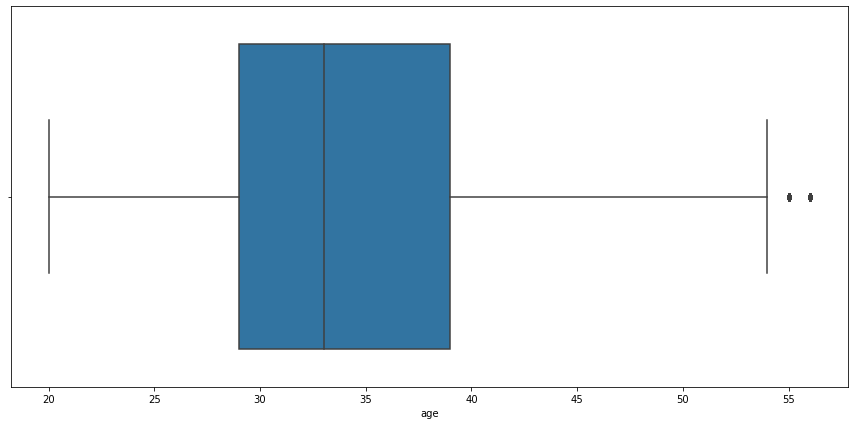

In [92]:
sns.boxplot(df['age'])

In [93]:
df['length_of_service'].values[df['length_of_service'].values>15]=15

<AxesSubplot:xlabel='length_of_service'>

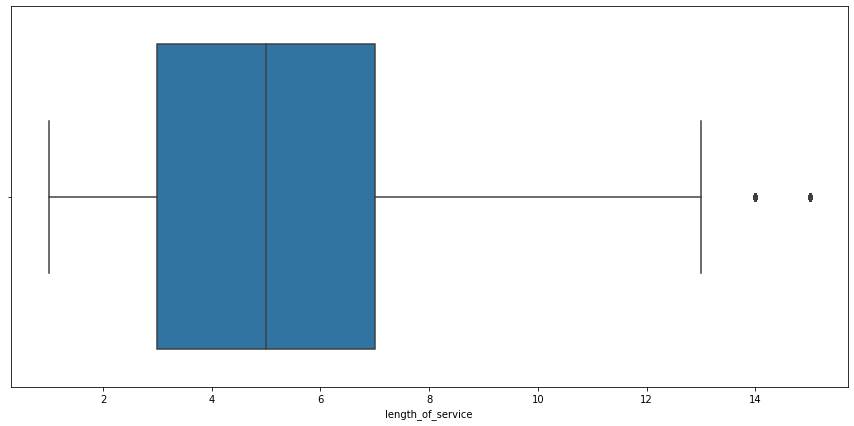

In [94]:
sns.boxplot(df['length_of_service'])

In [95]:
df.drop(['employee_id'],axis=1,inplace=True)

In [96]:
df['education'] = df['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
df['education'] = df['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

In [97]:
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,3,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,2,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,2,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,2,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,2,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,2,m,sourcing,1,48,3.0,15,0,0,78,0
54804,Operations,region_27,3,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,2,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,2,m,sourcing,1,29,1.0,2,0,0,45,0


In [98]:
df = pd.get_dummies(df, columns=['department','region','gender',
                              'recruitment_channel'])

In [99]:
df

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,3,1,35,5.0,8,1,0,49,0,0,...,0,0,1,0,0,1,0,0,0,1
1,2,1,30,5.0,4,0,0,60,0,0,...,0,0,0,0,0,0,1,1,0,0
2,2,1,34,3.0,7,0,0,50,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2,2,39,1.0,10,0,0,50,0,0,...,0,0,0,0,0,0,1,1,0,0
4,2,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,2,1,48,3.0,15,0,0,78,0,0,...,0,0,0,0,0,0,1,0,0,1
54804,3,1,37,2.0,6,0,0,56,0,0,...,0,0,0,0,0,1,0,1,0,0
54805,2,1,27,5.0,3,1,0,79,0,1,...,0,0,0,0,0,0,1,1,0,0
54806,2,1,29,1.0,2,0,0,45,0,0,...,0,0,0,0,1,0,1,0,0,1


In [100]:
cols = list(df.columns.values) 
cols.pop(cols.index('is_promoted')) 
df = df[cols+['is_promoted']] 

In [101]:
df

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,region_region_6,region_region_7,region_region_8,region_region_9,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
0,3,1,35,5.0,8,1,0,49,0,0,...,0,1,0,0,1,0,0,0,1,0
1,2,1,30,5.0,4,0,0,60,0,0,...,0,0,0,0,0,1,1,0,0,0
2,2,1,34,3.0,7,0,0,50,0,0,...,0,0,0,0,0,1,0,0,1,0
3,2,2,39,1.0,10,0,0,50,0,0,...,0,0,0,0,0,1,1,0,0,0
4,2,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,2,1,48,3.0,15,0,0,78,0,0,...,0,0,0,0,0,1,0,0,1,0
54804,3,1,37,2.0,6,0,0,56,0,0,...,0,0,0,0,1,0,1,0,0,0
54805,2,1,27,5.0,3,1,0,79,1,0,...,0,0,0,0,0,1,1,0,0,0
54806,2,1,29,1.0,2,0,0,45,0,0,...,0,0,0,1,0,1,0,0,1,0


In [102]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [103]:
print(X)

[[ 3.  1. 35. ...  0.  0.  1.]
 [ 2.  1. 30. ...  1.  0.  0.]
 [ 2.  1. 34. ...  0.  0.  1.]
 ...
 [ 2.  1. 27. ...  1.  0.  0.]
 [ 2.  1. 29. ...  0.  0.  1.]
 [ 2.  1. 27. ...  1.  0.  0.]]


In [104]:
print(y)

[0 0 0 ... 0 0 0]


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [106]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [107]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [108]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

0.9255610290093049
[0.96077677 0.27142857]
[0.92967442 0.71698113]
[0.99403223 0.16740088]


In [109]:
print(f'Final Training Accuracy: {classifier.score(X_train,y_train)*100}%')
print(f'Model Accuracy: {classifier.score(X_test,y_test)*100}%')

Final Training Accuracy: 92.26839392418921%
Model Accuracy: 92.5561029009305%


In [110]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[9994   60]
 [ 756  152]]


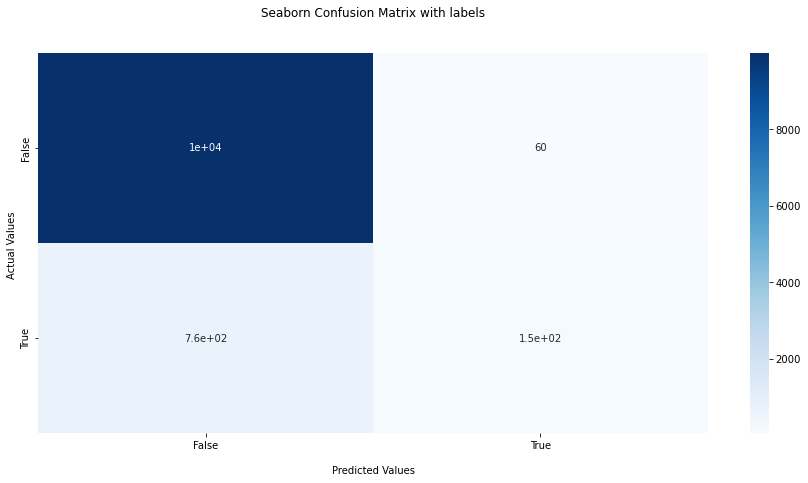

In [111]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [112]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

# checking the sizes of the sample data
print(X.shape)
print(y.shape)

(100280, 56)
(100280, 1)


In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [114]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [115]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [116]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

0.780364978061428
[0.77900968 0.78170375]
[0.79745275 0.76424419]
[0.76140041 0.79997971]


In [117]:
print(f'Final Training Accuracy: {classifier.score(X_train,y_train)*100}%')
print(f'Model Accuracy: {classifier.score(X_test,y_test)*100}%')

Final Training Accuracy: 78.3767949740726%
Model Accuracy: 78.0364978061428%


In [118]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[7764 2433]
 [1972 7887]]


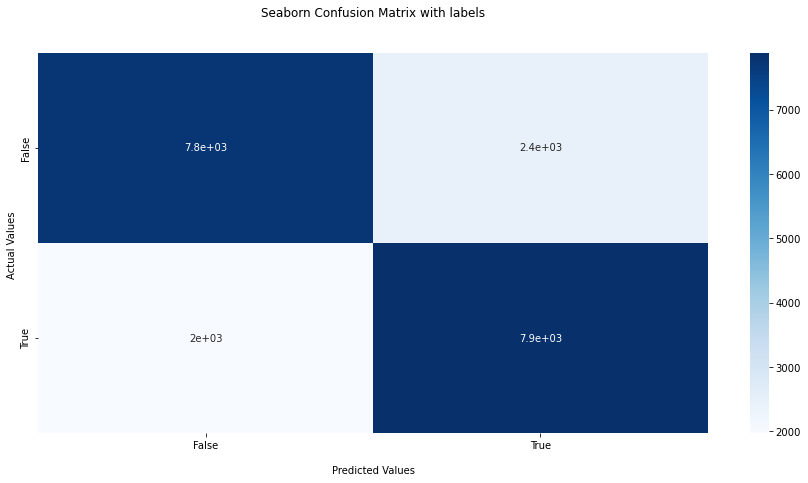

In [119]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [120]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)

[[ 3.  1. 35. ...  0.  0.  1.]
 [ 2.  1. 30. ...  1.  0.  0.]
 [ 2.  1. 34. ...  0.  0.  1.]
 ...
 [ 2.  1. 27. ...  1.  0.  0.]
 [ 2.  1. 29. ...  0.  0.  1.]
 [ 2.  1. 27. ...  1.  0.  0.]]


In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [122]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [123]:
y_pred = classifier.predict(X_test)

In [124]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

0.9251049078635285
[0.96056108 0.25835592]
[0.92892316 0.71859296]
[0.99443008 0.15748899]


In [125]:
print(f'Final Training Accuracy: {classifier.score(X_train,y_train)*100}%')
print(f'Model Accuracy: {classifier.score(X_test,y_test)*100}%')

Final Training Accuracy: 92.99594033663277%
Model Accuracy: 92.51049078635285%


In [126]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[9998   56]
 [ 765  143]]


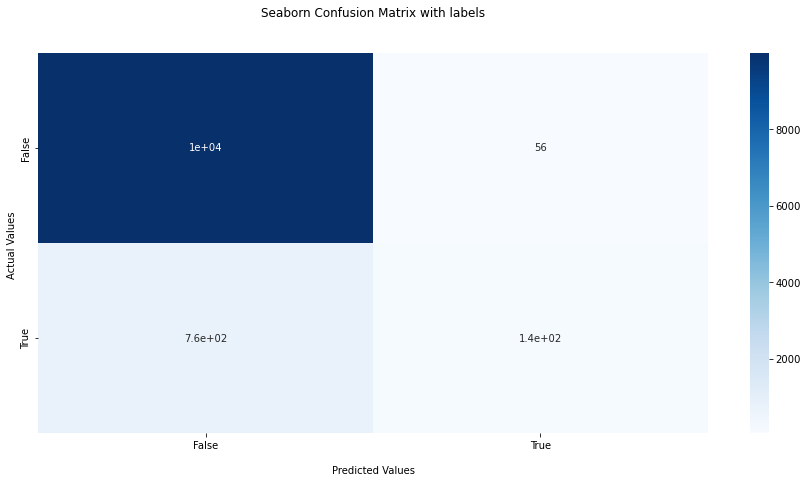

In [127]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [128]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

# checking the sizes of the sample data
print(X.shape)
print(y.shape)

(100280, 56)
(100280, 1)


In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [130]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [131]:
y_pred = classifier.predict(X_test)

In [132]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

0.8613382528919027
[0.84223067 0.87631755]
[0.99905787 0.78029463]
[0.7279592  0.99928999]


In [133]:
print(f'Final Training Accuracy: {classifier.score(X_train,y_train)*100}%')
print(f'Model Accuracy: {classifier.score(X_test,y_test)*100}%')

Final Training Accuracy: 90.23484244116474%
Model Accuracy: 86.13382528919027%


In [134]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[7423 2774]
 [   7 9852]]


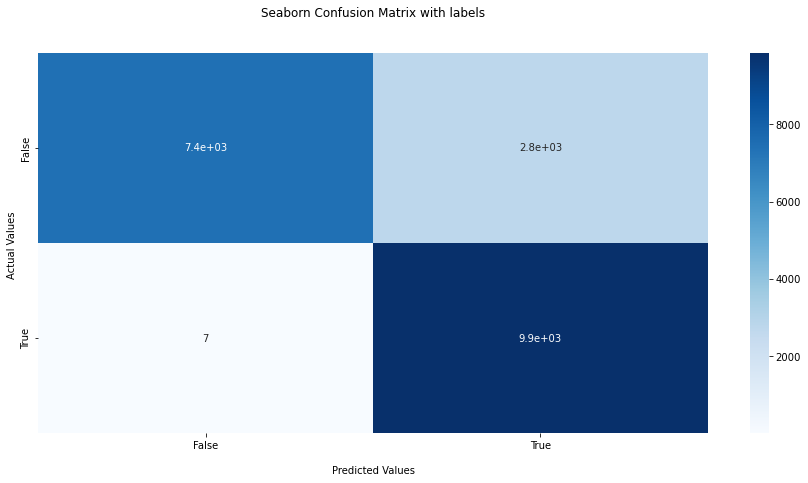

In [135]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [136]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)

[[ 3.  1. 35. ...  0.  0.  1.]
 [ 2.  1. 30. ...  1.  0.  0.]
 [ 2.  1. 34. ...  0.  0.  1.]
 ...
 [ 2.  1. 27. ...  1.  0.  0.]
 [ 2.  1. 29. ...  0.  0.  1.]
 [ 2.  1. 27. ...  1.  0.  0.]]


In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [138]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [139]:
y_pred = classifier.predict(X_test)

In [140]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

0.38213829593139936
[0.50260704 0.18466354]
[0.96042661 0.10366266]
[0.34036204 0.84471366]


In [141]:
print(f'Final Training Accuracy: {classifier.score(X_train,y_train)*100}%')
print(f'Model Accuracy: {classifier.score(X_test,y_test)*100}%')

Final Training Accuracy: 38.79259225470967%
Model Accuracy: 38.213829593139934%


In [142]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[3422 6632]
 [ 141  767]]


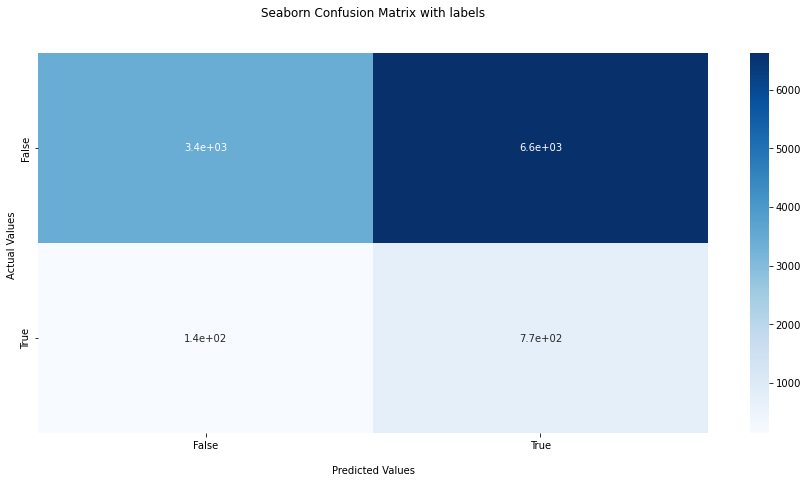

In [143]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [144]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

# checking the sizes of the sample data
print(X.shape)
print(y.shape)

(100280, 56)
(100280, 1)


In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [146]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [147]:
y_pred = classifier.predict(X_test)

In [148]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

0.6196649381731153
[0.52271305 0.68387899]
[0.72203976 0.57816551]
[0.40963028 0.83690029]


In [149]:
print(f'Final Training Accuracy: {classifier.score(X_train,y_train)*100}%')
print(f'Model Accuracy: {classifier.score(X_test,y_test)*100}%')

Final Training Accuracy: 62.5%
Model Accuracy: 61.96649381731153%


In [150]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[4177 6020]
 [1608 8251]]


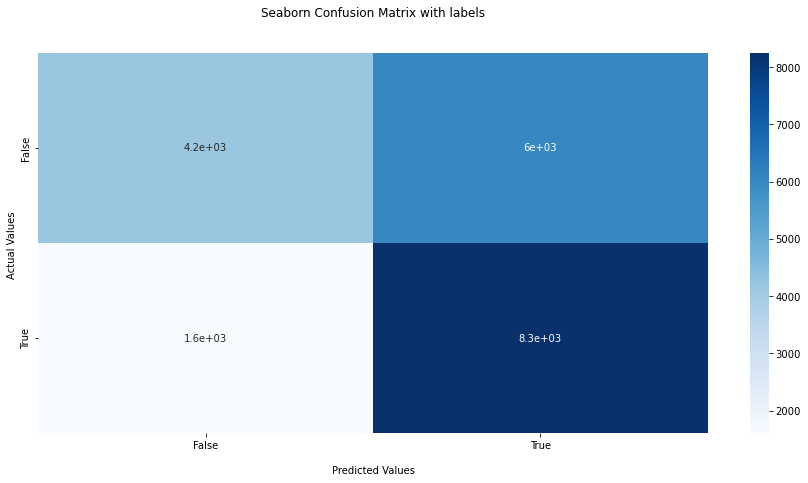

In [151]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [152]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)

[[ 3.  1. 35. ...  0.  0.  1.]
 [ 2.  1. 30. ...  1.  0.  0.]
 [ 2.  1. 34. ...  0.  0.  1.]
 ...
 [ 2.  1. 27. ...  1.  0.  0.]
 [ 2.  1. 29. ...  0.  0.  1.]
 [ 2.  1. 27. ...  1.  0.  0.]]


In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [154]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [155]:
y_pred = classifier.predict(X_test)

In [156]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

0.9012041598248495
[0.94596078 0.42485396]
[0.94913387 0.41025641]
[0.94280883 0.44052863]


In [157]:
print(f'Final Training Accuracy: {classifier.score(X_train,y_train)*100}%')
print(f'Model Accuracy: {classifier.score(X_test,y_test)*100}%')

Final Training Accuracy: 99.97263148291748%
Model Accuracy: 90.12041598248494%


In [158]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[9479  575]
 [ 508  400]]


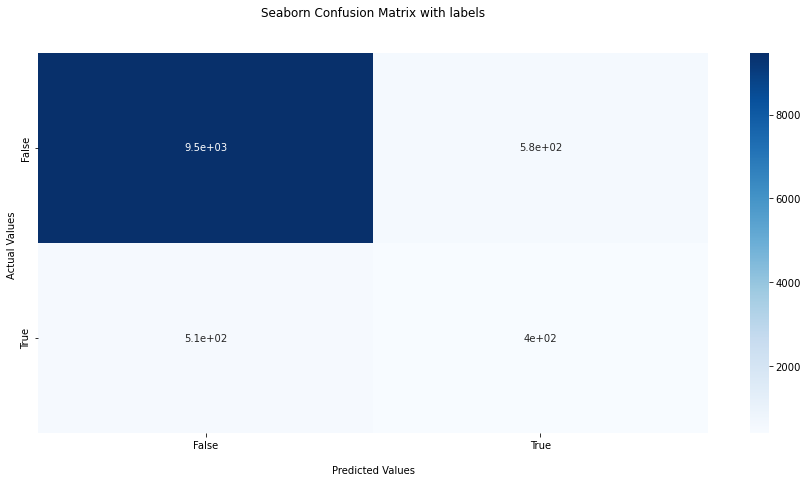

In [159]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [160]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

# checking the sizes of the sample data
print(X.shape)
print(y.shape)

(100280, 56)
(100280, 1)


In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [162]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [163]:
y_pred = classifier.predict(X_test)

In [164]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

0.9452532907857998
[0.94582059 0.94467399]
[0.95183236 0.93862021]
[0.93988428 0.95080637]


In [165]:
print(f'Final Training Accuracy: {classifier.score(X_train,y_train)*100}%')
print(f'Model Accuracy: {classifier.score(X_test,y_test)*100}%')

Final Training Accuracy: 99.99127443159155%
Model Accuracy: 94.52532907857997%


In [166]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[9584  613]
 [ 485 9374]]


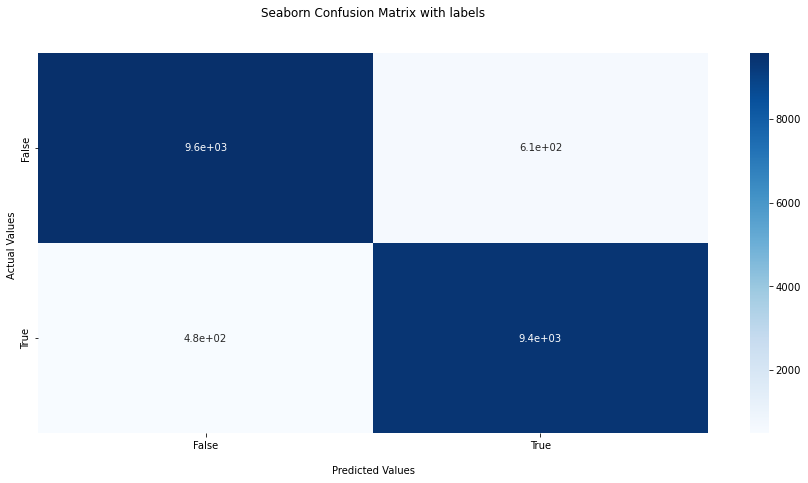

In [167]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [168]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)

[[ 3.  1. 35. ...  0.  0.  1.]
 [ 2.  1. 30. ...  1.  0.  0.]
 [ 2.  1. 34. ...  0.  0.  1.]
 ...
 [ 2.  1. 27. ...  1.  0.  0.]
 [ 2.  1. 29. ...  0.  0.  1.]
 [ 2.  1. 27. ...  1.  0.  0.]]


In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [173]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [174]:
y_pred = classifier.predict(X_test)

In [175]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

0.9318555008210181
[0.9638764 0.4      ]
[0.93797647 0.7388724 ]
[0.99124726 0.27422907]


In [176]:
print(f'Final Training Accuracy: {classifier.score(X_train,y_train)*100}%')
print(f'Model Accuracy: {classifier.score(X_test,y_test)*100}%')

Final Training Accuracy: 98.95087351183687%
Model Accuracy: 93.18555008210181%


In [177]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[9966   88]
 [ 659  249]]


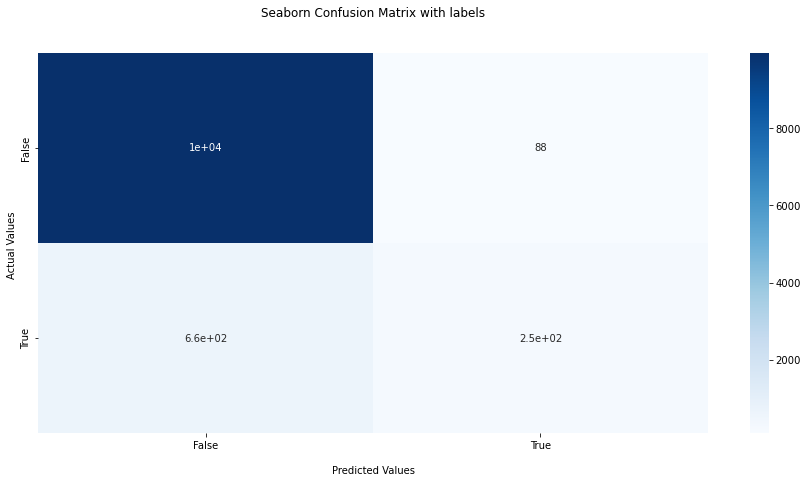

In [178]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [179]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

# checking the sizes of the sample data
print(X.shape)
print(y.shape)

(100280, 56)
(100280, 1)


In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [181]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [182]:
y_pred = classifier.predict(X_test)

In [183]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

0.9622556840845632
[0.96377124 0.9606078 ]
[0.94120396 0.98632186]
[0.98744729 0.93620043]


In [184]:
print(f'Final Training Accuracy: {classifier.score(X_train,y_train)*100}%')
print(f'Model Accuracy: {classifier.score(X_test,y_test)*100}%')

Final Training Accuracy: 99.60984244116474%
Model Accuracy: 96.22556840845633%


In [185]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[10069   128]
 [  629  9230]]


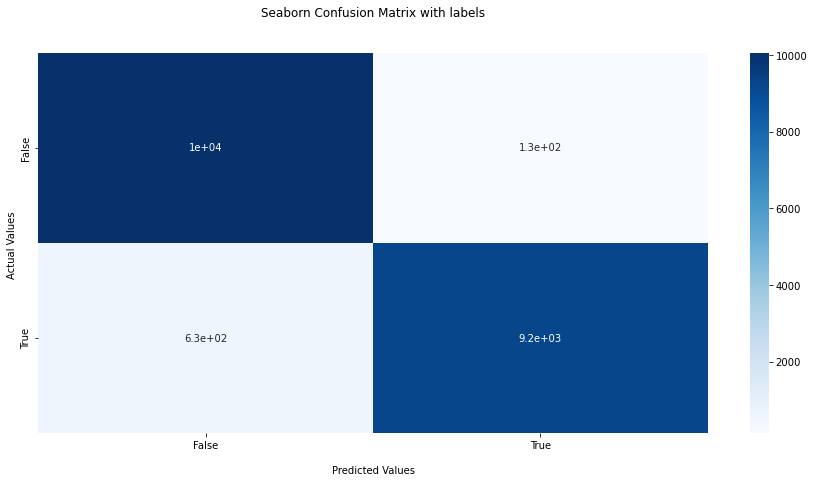

In [186]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


## Random Forest gave the best results